# Defining Our Data Exploration Strategy 

We will be visually exploring the raw data that was provided and try to understand the nature of the data and various relationships between the features.

We will be doing the basic checks and then map the various categorical features to their original category instead of a numeric one; this will provide us with a more stimulating visualization and help us understand the relationships quite easily.

# Import Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [40]:
excel_file_path = '../../Data/Raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df = pd.read_excel(excel_file_path)
pd.set_option('display.max_columns',None)
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


# Basic Checks

In [41]:
rows = df.shape[0]
cols = df.shape[1]

print(f'In this dataset we have {rows} rows and {cols} columns')

In this dataset we have 1200 rows and 28 columns


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [43]:
print(f"In the dataset there are {len(df.select_dtypes('O').columns)} categorical columns")
print(f"In the dataset there are {len(df.select_dtypes('number').columns)} numerical columns")

In the dataset there are 9 categorical columns
In the dataset there are 19 numerical columns


In [44]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [45]:
df.describe(include = 'O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [46]:
csv_file_path = '../../Data/Processed/Emp_data_formated_for_EDA.csv'
df.to_csv(csv_file_path, index=False)

In [47]:
df = pd.read_csv(csv_file_path).drop(['EmpNumber'],axis =1)
pd.set_option('display.max_columns',None)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


# Mapping Actual Categories Of Various Features

In [48]:
# Mapping dictionary
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Map the values in the 'EmpEducationLevel' column
df['EmpEducationLevel'] = df['EmpEducationLevel'].map(education_mapping)

In [49]:
# Mapping dictionary
performance_rating_mapping = {
    1: '1:Low',
    2: '2:Good',
    3: '3:Excellent',
    4: '4:Outstanding'
}

# Map the values in the 'PerformanceRating' column
df['PerformanceRating'] = df['PerformanceRating'].map(performance_rating_mapping)

In [50]:
# Mapping dictionary
work_life_balance_mapping = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Map the values in the 'EmpWorkLifeBalance' column
df['EmpWorkLifeBalance'] = df['EmpWorkLifeBalance'].map(work_life_balance_mapping)

In [51]:
cols = ['EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobSatisfaction','EmpRelationshipSatisfaction']

mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

for i in cols:
    df[i] = df[i].map(mapping )

In [52]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,Bachelor,Very High,55,High,2,Very High,1,No,12,Very High,10,2,Good,10,7,0,8,No,3:Excellent
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,Master,Very High,42,High,2,Low,2,No,12,Very High,20,2,Better,7,7,1,7,No,3:Excellent
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,Master,Very High,48,Medium,3,Low,5,Yes,21,High,20,2,Better,18,13,1,12,No,4:Outstanding
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,Master,Medium,73,Medium,5,Very High,3,No,15,Medium,23,2,Good,21,6,12,6,No,3:Excellent
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,Master,Low,84,High,2,Low,8,No,14,Very High,10,1,Better,2,2,2,2,No,3:Excellent


# Exploratory Data Analysis

At first we will split our dataset into two with one containing only numerical features and the other containing all the categorical features

In [53]:
cat_df = df.select_dtypes('O')
num_df = df.select_dtypes('number')

## Univariate Analysis

### Visualizing the numerical columns

Lets visualize our numerical dataset with histogram with kde curve to view the distribution of data of our numerical features

In [54]:
num_df.head()

,Age,DistanceFromHome,EmpHourlyRate,EmpJobLevel,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,55,2,1,12,10,2,10,7,0,8
1,47,14,42,2,2,12,20,2,7,7,1,7
2,40,5,48,3,5,21,20,2,18,13,1,12
3,41,10,73,5,3,15,23,2,21,6,12,6
4,60,16,84,2,8,14,10,1,2,2,2,2


#### Visualizing the distribution of ages of customers in our dataset 

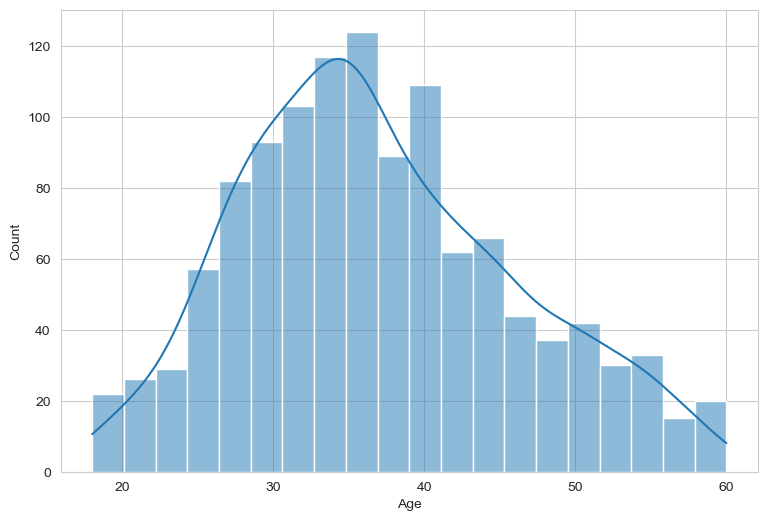

In [55]:
plt.figure(figsize = (9,6))
sns.histplot(num_df['Age'],bins =20,kde =True);

#### Our Insights:

1) It looks like there are some young people working at the age of 20 and the oldest employees consists of 60 years of age.

2) Most of the employees are between 35 to 40 years of age

3) The age column has data that is quite normally distributed. 

#### Visualizing the distribution of DistanceFromHome column in our dataset

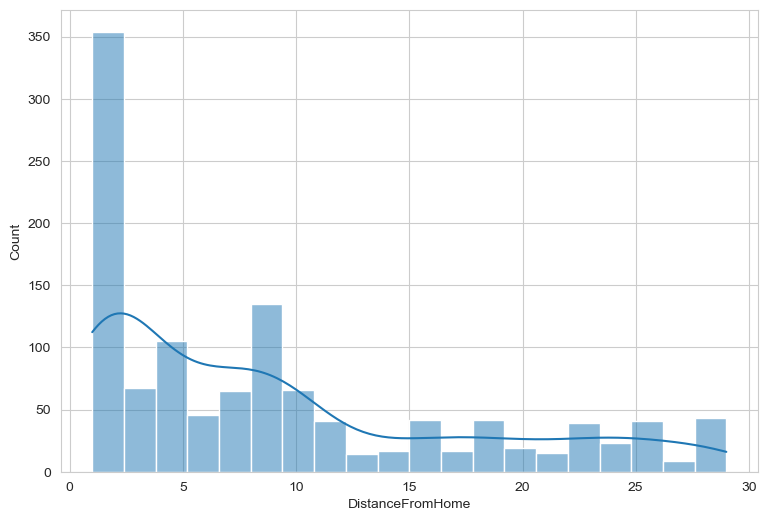

In [56]:
plt.figure(figsize = (9,6))
sns.histplot(num_df['DistanceFromHome'],bins =20,kde =True);

#### Our Insights:

1) In our dataset most of the employees live closer to the office.

2) Very few employees like as far as 30 kms from the office.

#### Visualizing the distribution of other numerical features of our dataset

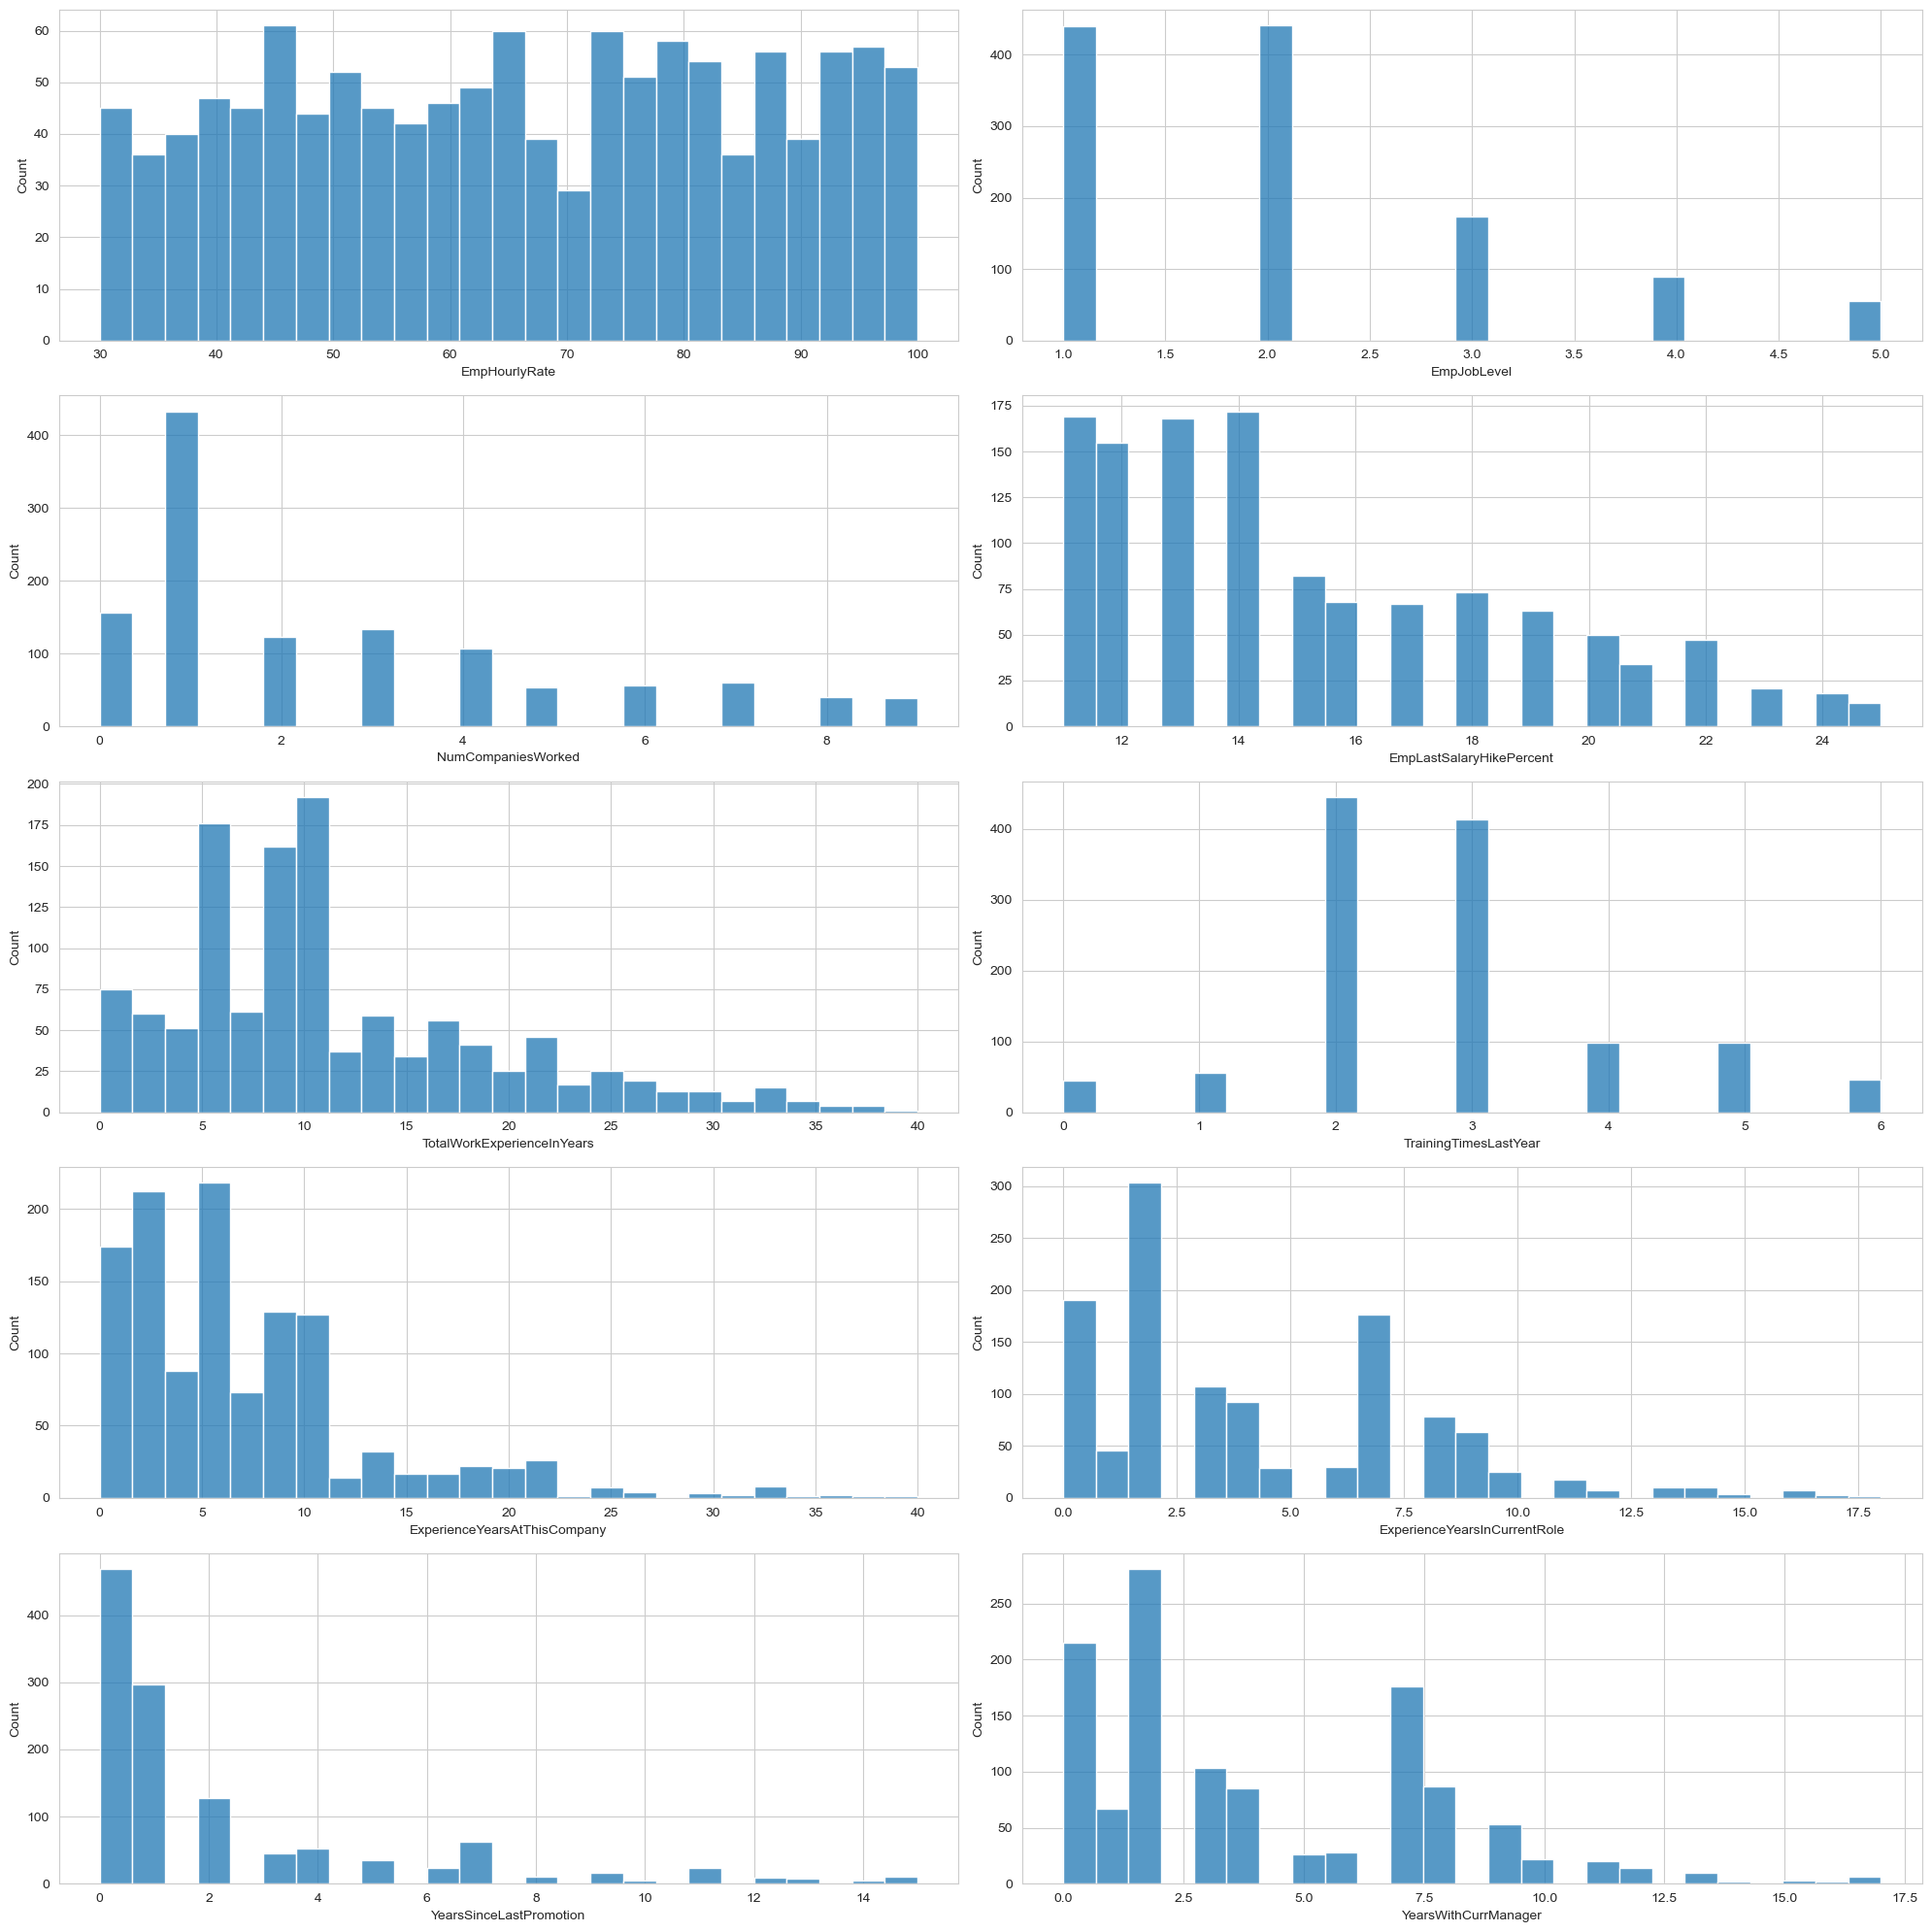

In [57]:
cols = num_df.columns[2:].to_list()

# create a new dataframe with only the selected columns
df_selected = num_df[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col,bins = 25, ax=axs[i])
    axs[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

#### Our Insights:

1) Most of the employees in our dataset has an hourly rate between 45 to 70. However we see that some employees are having 100 hourly rate.

2) In our firm we have relatively newly employeed staffs as we see that most employees having entry level between 1 and 2 and they worked in very few firms previously

3) Compared to the employees last salary hike which was mostly around only 11%-14%, most of the employees work experience were around 5 - 10 years. We also see that the most employees working in our company has the same total experience in thier total professional life and they were mostly given 2 - 3 times training last year.

4) We see that most employees who had worked in the same role has mostly the same manager they are working under. However we noticed a that many of the employees were getting promotion within 1 - 1.5 years.

### Visualizing the categorical columns

In [58]:
cat_df.head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Attrition,PerformanceRating
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,Bachelor,Very High,High,Very High,No,Very High,Good,No,3:Excellent
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,Master,Very High,High,Low,No,Very High,Better,No,3:Excellent
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Master,Very High,Medium,Low,Yes,High,Better,No,4:Outstanding
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,Master,Medium,Medium,Very High,No,Medium,Good,No,3:Excellent
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,Master,Low,High,Low,No,Very High,Better,No,3:Excellent


#### Visualizing the distribution of employees performance ratings

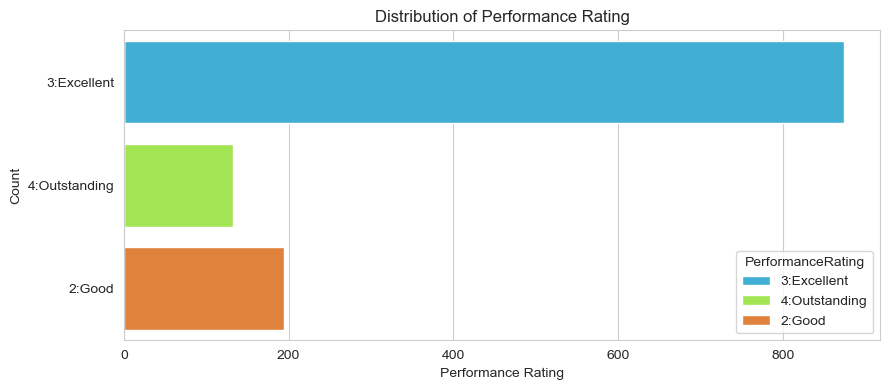

In [59]:
plt.figure(figsize=(9, 4))
sns.countplot(y='PerformanceRating', data=cat_df, palette='turbo', hue='PerformanceRating', dodge=False)
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.tight_layout()


plt.show()

**Our Insights:**

It look like that most employees are getting excellent rating and it is also noted that there are not a single employee who have low rating.  

#### Visualizing the distribution of employees gender

In [60]:
import plotly.express as px

fig = px.bar(cat_df, x='Gender', title='Distribution of Gender', color='Gender',
             labels={'Gender': 'Gender', 'count': 'Count'}, template='plotly') 

fig.update_layout(scene=dict(aspectmode='cube', camera_eye=dict(x=1.2, y=1.2, z=0.6)),
                  xaxis_title='Gender', yaxis_title='Count', showlegend=False)

fig.show()


**Our Insights:** In the firm more males are employeed than females

#### Visualizing the distribution of employees environment satisfaction

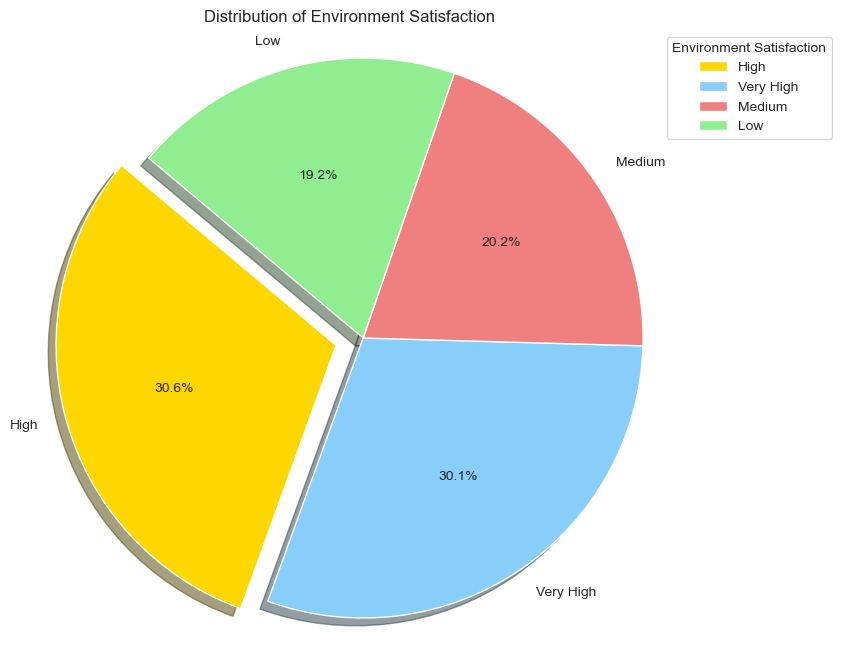

In [61]:
counts = cat_df['EmpEnvironmentSatisfaction'].value_counts()

plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)  
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal')  
plt.title('Distribution of Environment Satisfaction')

plt.legend(counts.index, title="Environment Satisfaction", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Our Insights:** 

I found most of the employees have highly rated their job environment satisfaction.

#### Visualizing the distribution of employees educational background

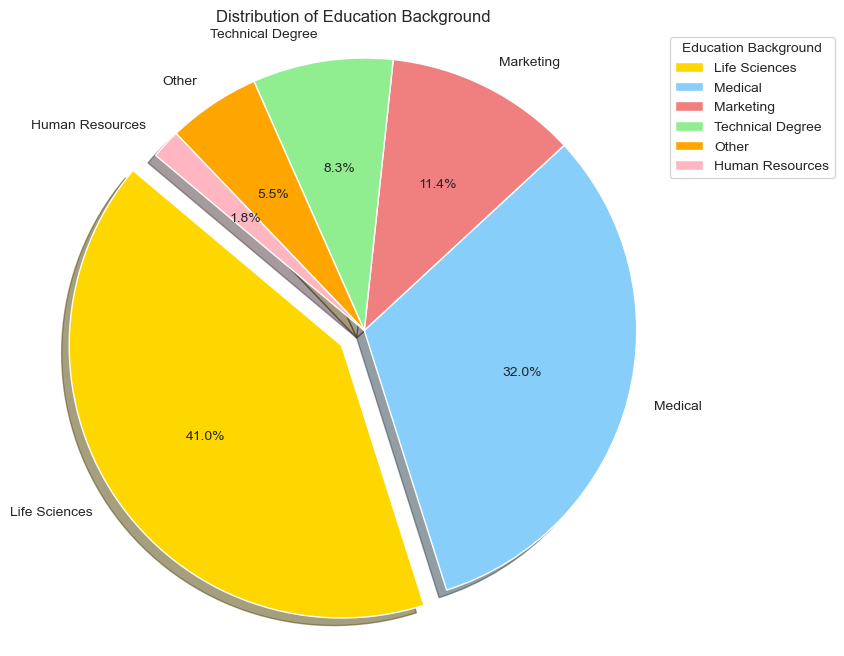

In [62]:
education_counts = cat_df['EducationBackground'].value_counts()


plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0, 0, 0)  
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']
plt.pie(education_counts, labels=education_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal') 
plt.title('Distribution of Education Background')

plt.legend(education_counts.index, title="Education Background", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


**Our Insights:**

Most of the employees are from Life sciences and Medical backgroud and very few from human resource management division. 

#### Visualizing the distribution of employee job role

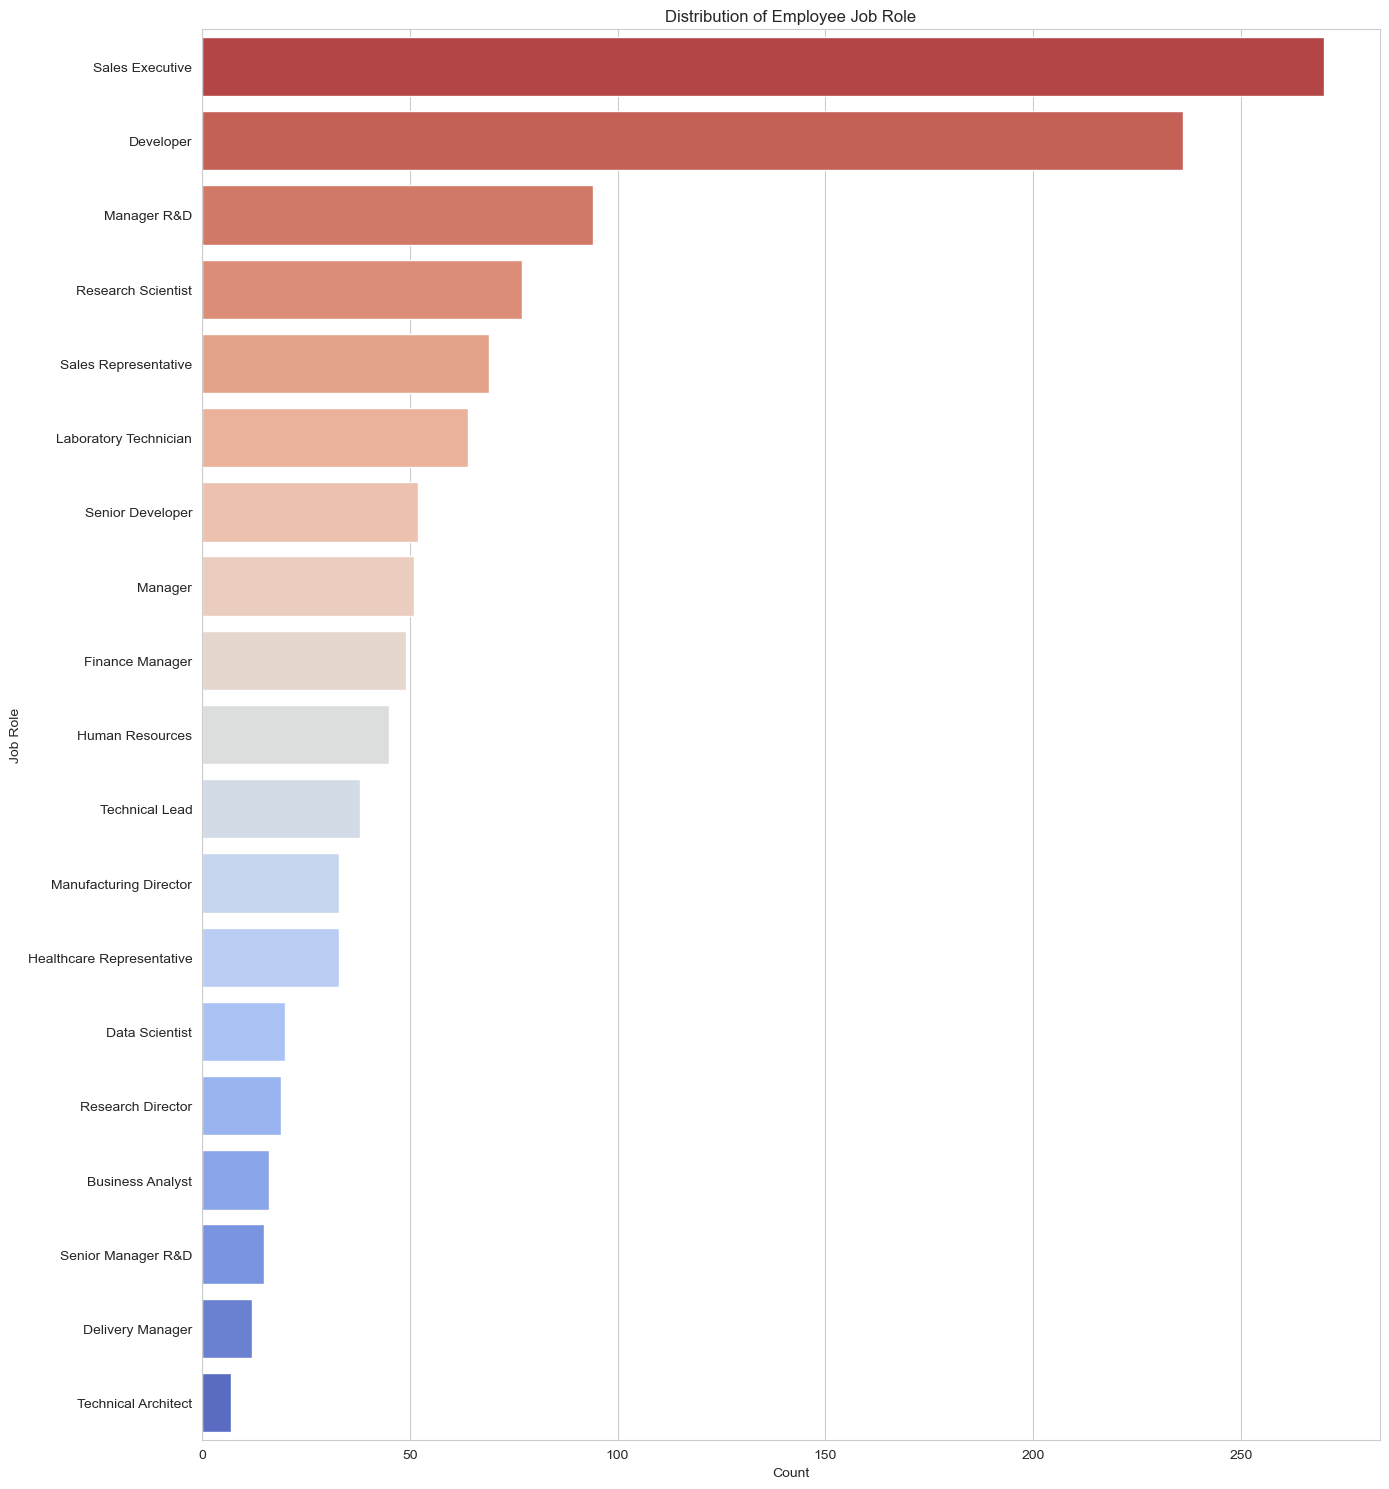

In [63]:
job_role_counts = cat_df['EmpJobRole'].value_counts()
sorted_job_roles = job_role_counts.index

plt.figure(figsize=(14, 15))
sns.countplot(y='EmpJobRole', data=cat_df, palette='coolwarm_r', dodge=False, order=sorted_job_roles)
plt.title('Distribution of Employee Job Role')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.tight_layout()

plt.show()

**Our Insights:** 
    
Most of the employees have job role as sales executives, Development and R&D. We saw in the previous chart that most of the employees are from life sciences and medical backgroud but they are being tasked to do very techical and sales related jobs which is vastly different from the medical field. Maybe it could be one of the reason why the morale of the employees are decreasing.

#### Visualizing the distribution of other categorical data

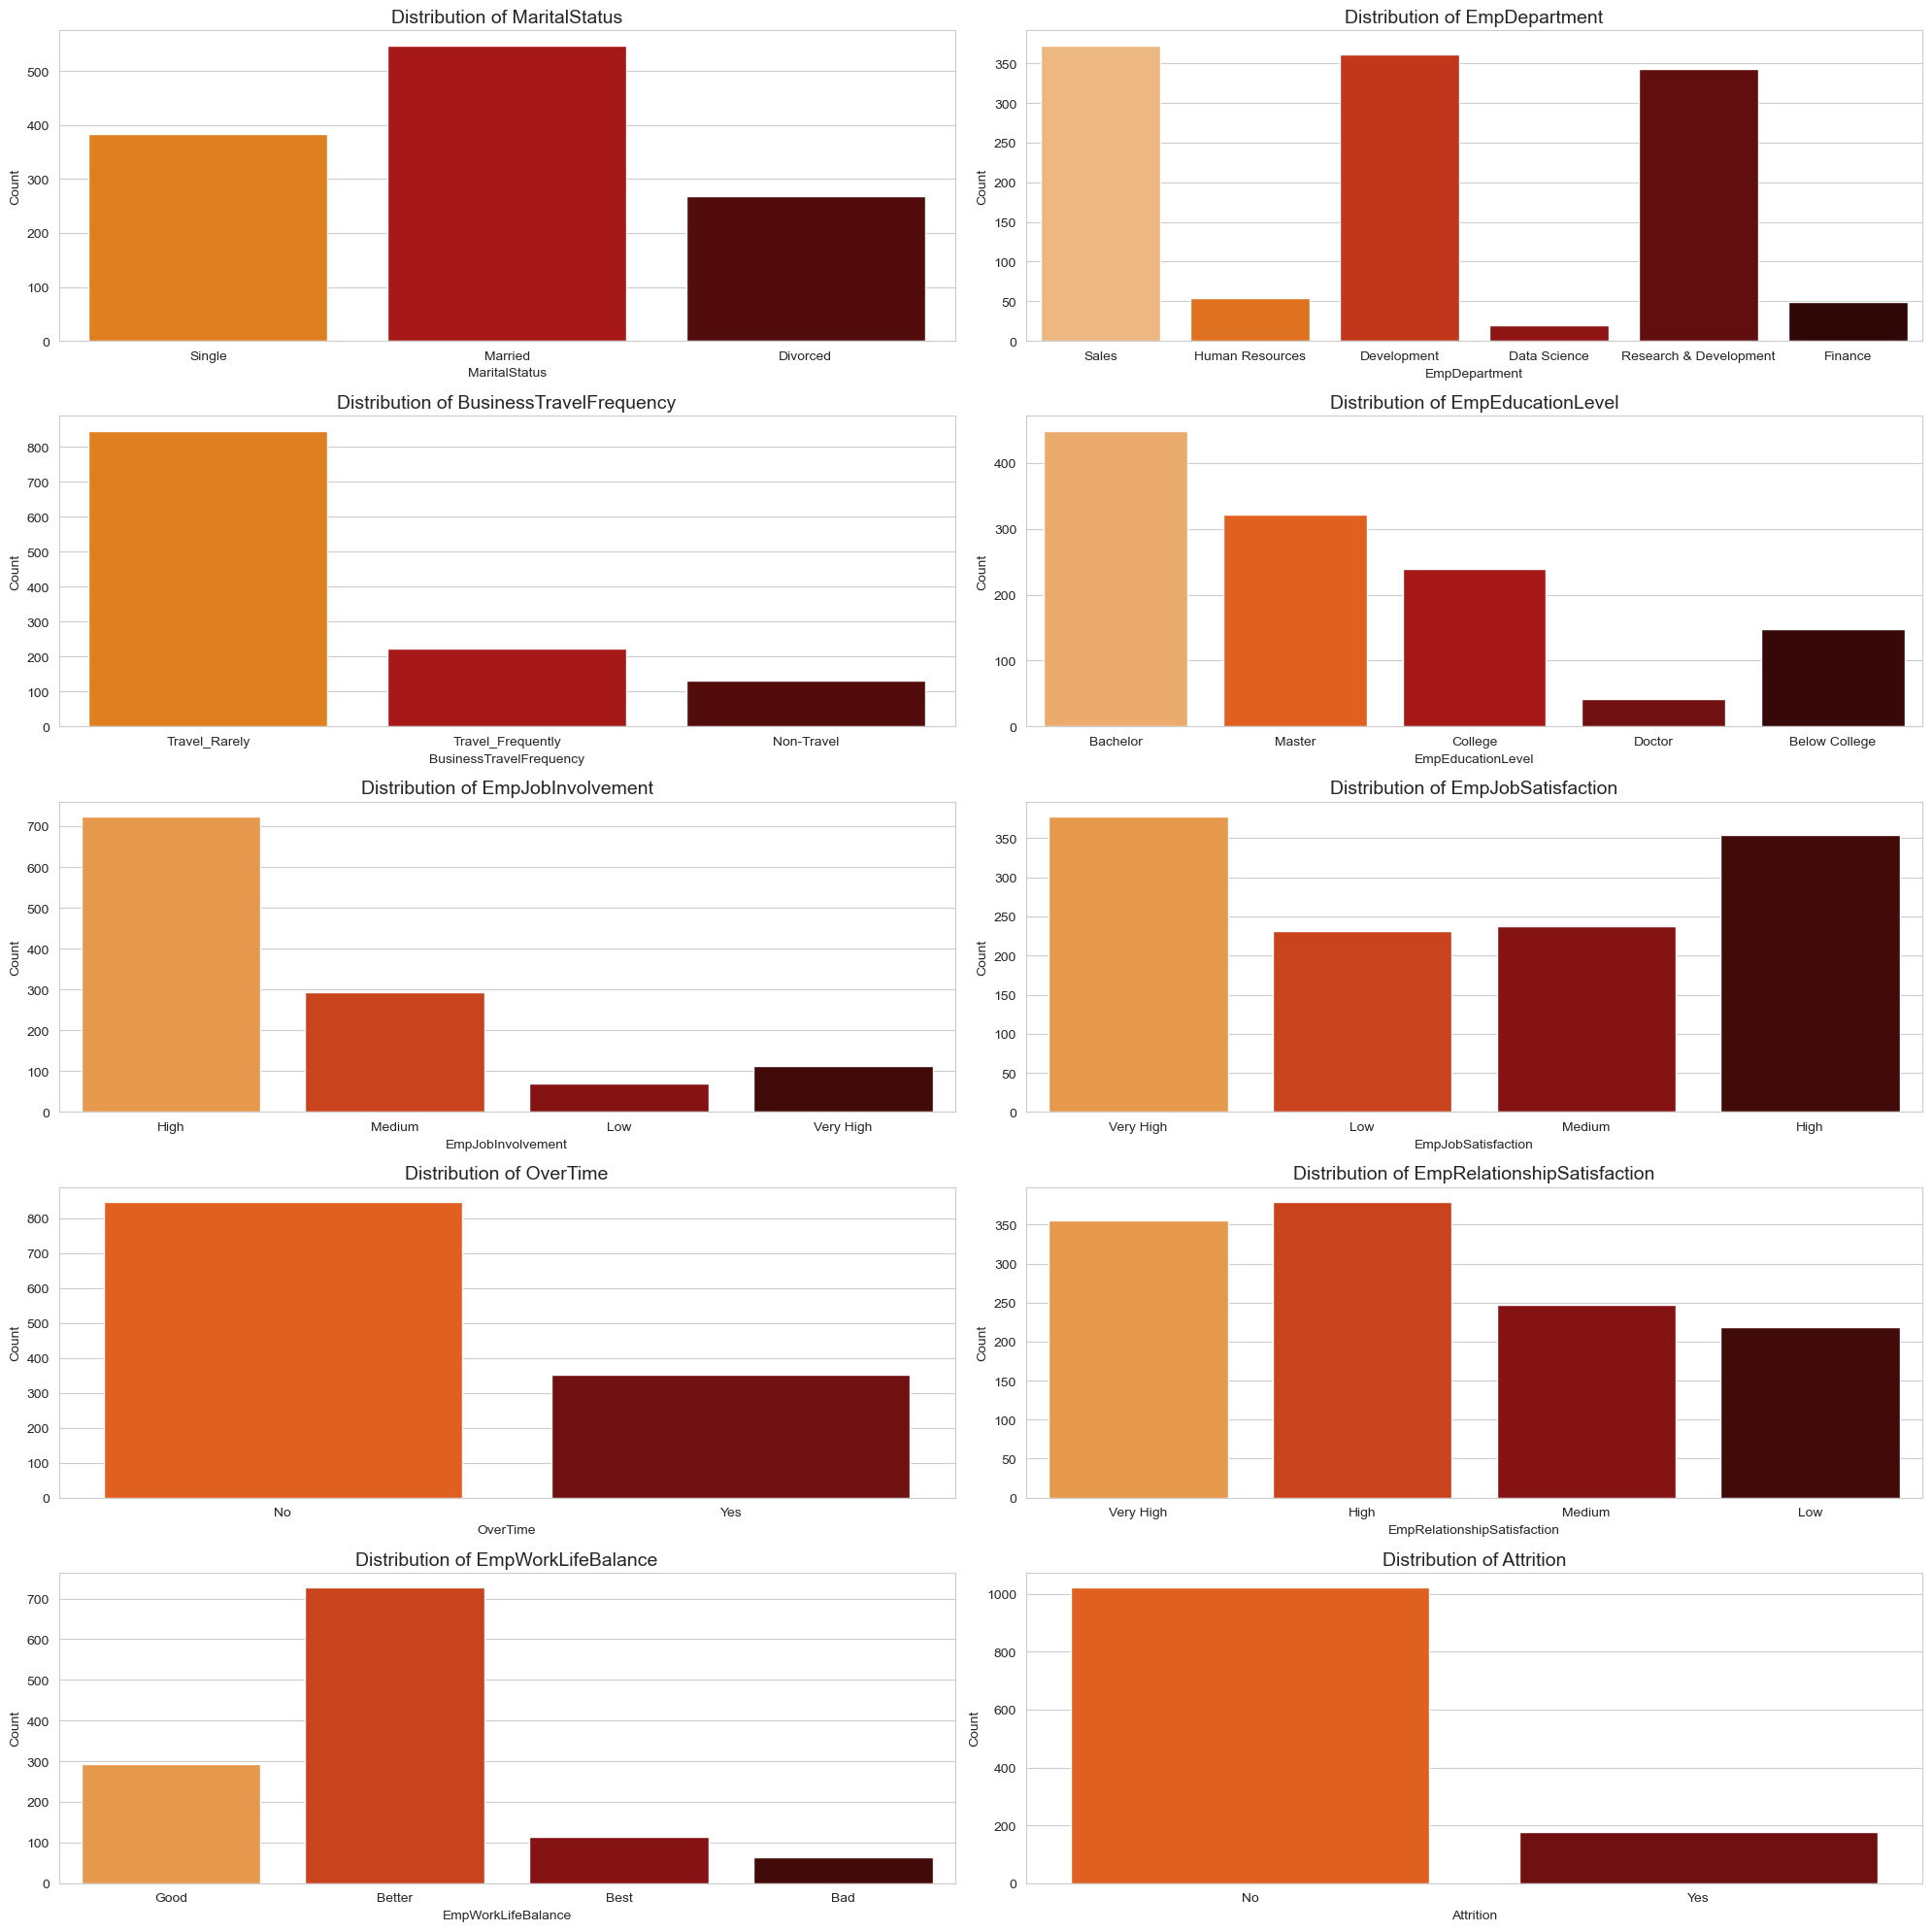

In [64]:
cols = ['MaritalStatus', 'EmpDepartment', 'BusinessTravelFrequency', 'EmpEducationLevel', 
        'EmpJobInvolvement', 'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction', 
        'EmpWorkLifeBalance', 'Attrition']

df_selected = cat_df[cols]

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axs = axs.flatten()


for i, col in enumerate(df_selected.columns):
    sns.countplot(data=df_selected, x=col, ax=axs[i], palette='gist_heat_r')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count') 
    axs[i].set_title(f'Distribution of {col}', fontsize=14) 

plt.tight_layout()
plt.show()

**Our Insights:**

1) Most of the employees in our firm are married.

2) Sales, Development and R&D make up the most of the department in our firm.

3) Most of the employees travel frequently, has a bachelor’s degree and they rated 'very high' in their job satisfaction.

4) Even though most of the employees do not work overtime their job involvement remains very high.

5) It is a positive thing that most employees are not leaving the organization and they have a 'better' work life balance.



## Bivariate Analysis

In [65]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,Bachelor,Very High,55,High,2,Very High,1,No,12,Very High,10,2,Good,10,7,0,8,No,3:Excellent
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,Master,Very High,42,High,2,Low,2,No,12,Very High,20,2,Better,7,7,1,7,No,3:Excellent
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,Master,Very High,48,Medium,3,Low,5,Yes,21,High,20,2,Better,18,13,1,12,No,4:Outstanding
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,Master,Medium,73,Medium,5,Very High,3,No,15,Medium,23,2,Good,21,6,12,6,No,3:Excellent
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,Master,Low,84,High,2,Low,8,No,14,Very High,10,1,Better,2,2,2,2,No,3:Excellent


#### We will visualize which gender of what age group is leaving the firm for each department

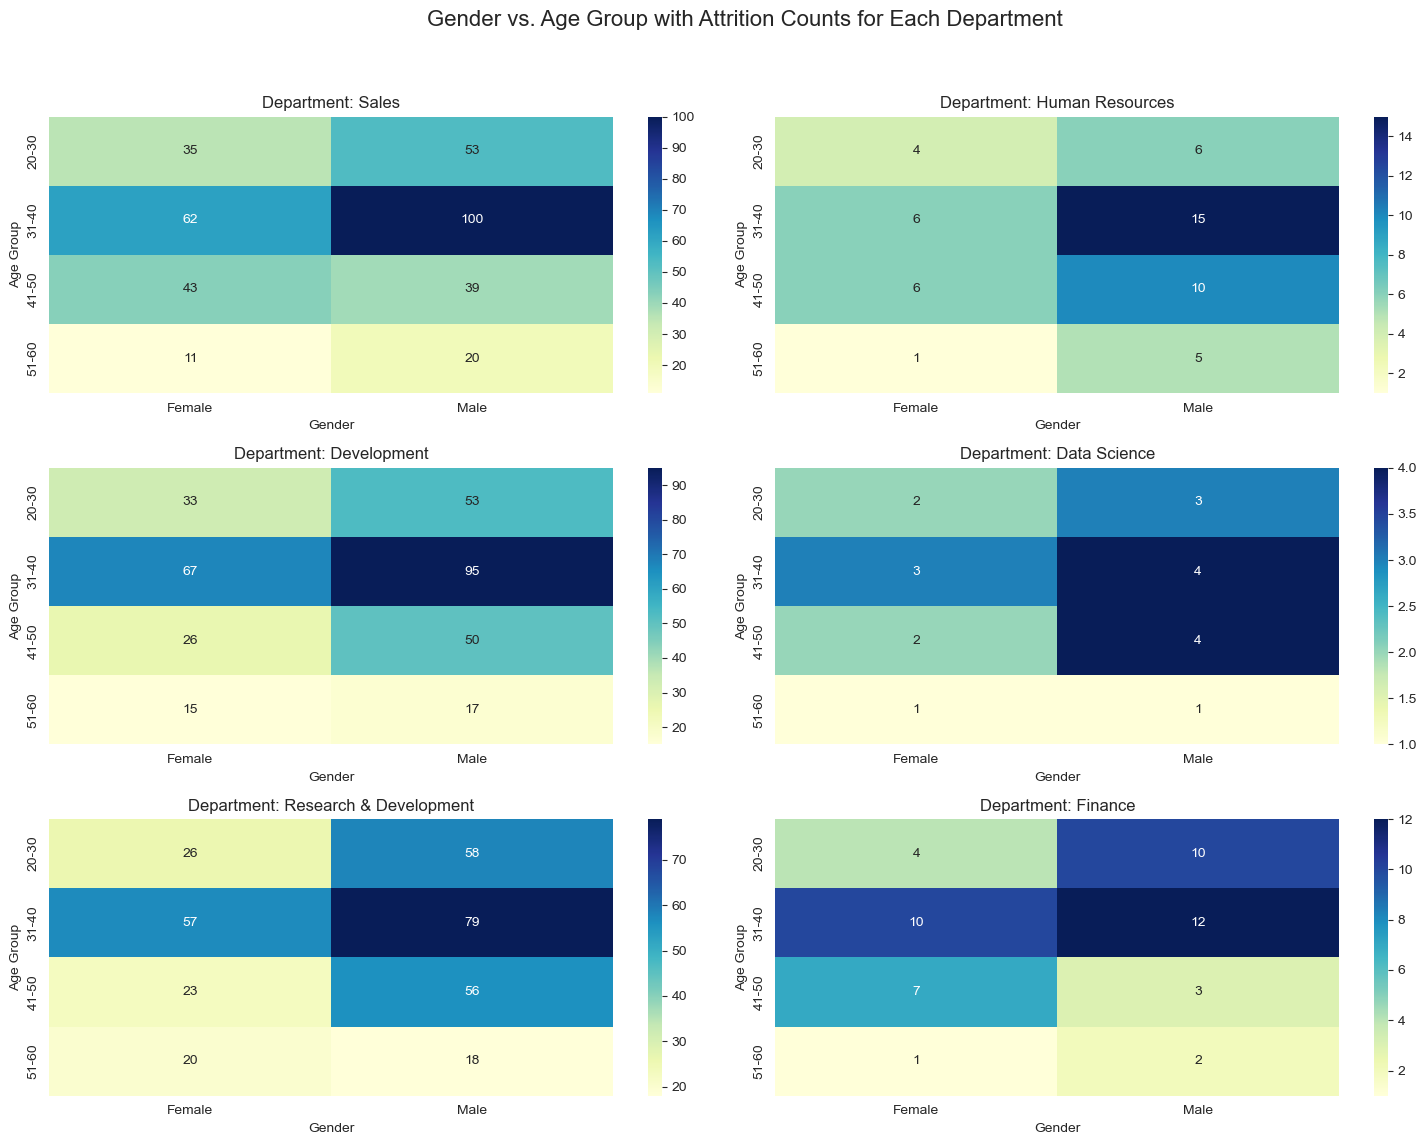

In [66]:
age_bins = [20, 30, 40, 50, 60]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=['20-30', '31-40', '41-50', '51-60'])

departments = df['EmpDepartment'].unique()

n_rows = 3
n_cols = 2


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Gender vs. Age Group with Attrition Counts for Each Department', fontsize=16)

axes = axes.flatten()

for i, department in enumerate(departments):
    ax = axes[i]
    subset_df = df[df['EmpDepartment'] == department]
    
    heatmap_data = subset_df.pivot_table(index='AgeGroup', columns='Gender', values='Attrition', aggfunc='count')
    
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', ax=ax)
    ax.set_title(f'Department: {department}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Age Group')

for i in range(len(departments), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


**Our Insights:** We see that both males and females in the age group of 31-40 are mostly leaving the firm for all departments

#### We will visualize employees job satisfaction by age group for each department

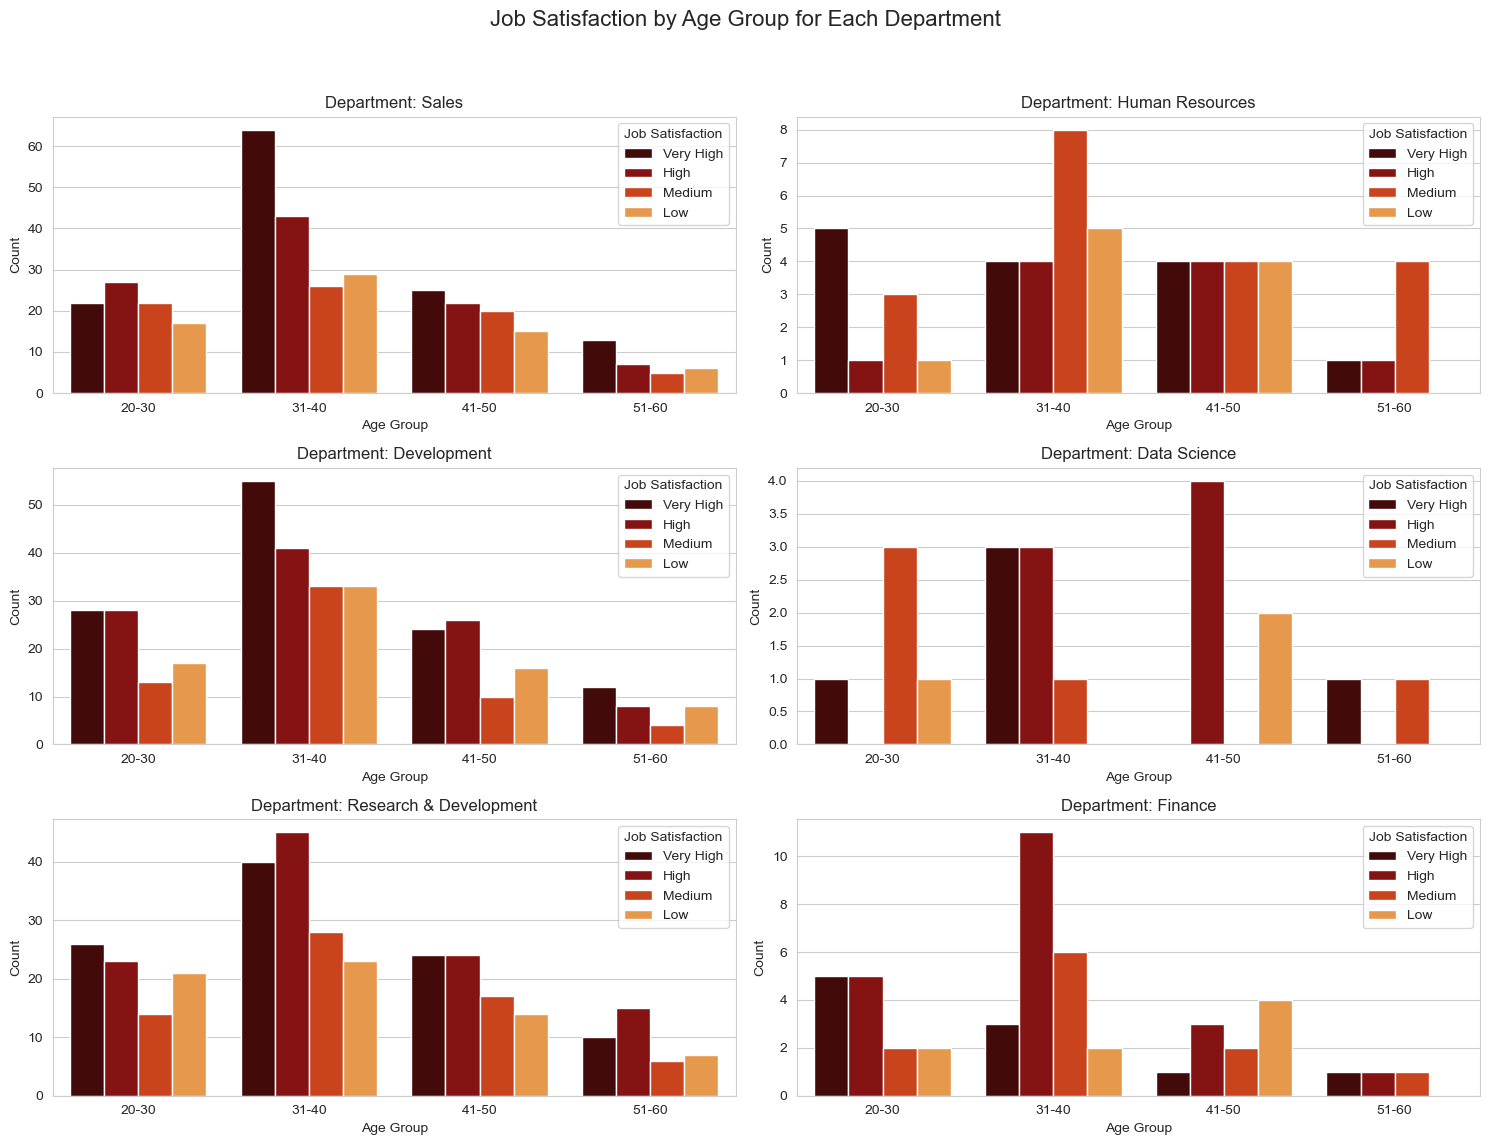

In [67]:
age_bins = [20, 30, 40, 50, 60]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=['20-30', '31-40', '41-50', '51-60'])

satisfaction_order = df['EmpJobSatisfaction'].value_counts().index.to_list()

departments = df['EmpDepartment'].unique()

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Job Satisfaction by Age Group for Each Department', fontsize=16)

axes = axes.flatten()

for i, department in enumerate(departments):
    ax = axes[i]
    subset_df = df[df['EmpDepartment'] == department]
    
    sns.countplot(data=subset_df, x='AgeGroup', hue='EmpJobSatisfaction', order=['20-30', '31-40', '41-50', '51-60'], hue_order=satisfaction_order, palette='gist_heat', ax=ax)
    ax.set_title(f'Department: {department}')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.legend(title='Job Satisfaction', loc='upper right', labels=satisfaction_order)
    
for i in range(len(departments), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**Our Insights:** We find out that younger employees between the ages of 20 to 30 are more satisfied with their job.

#### We will visualize which gender is travelling frequently based on their departments, whether they are satisfied or not and their marital status

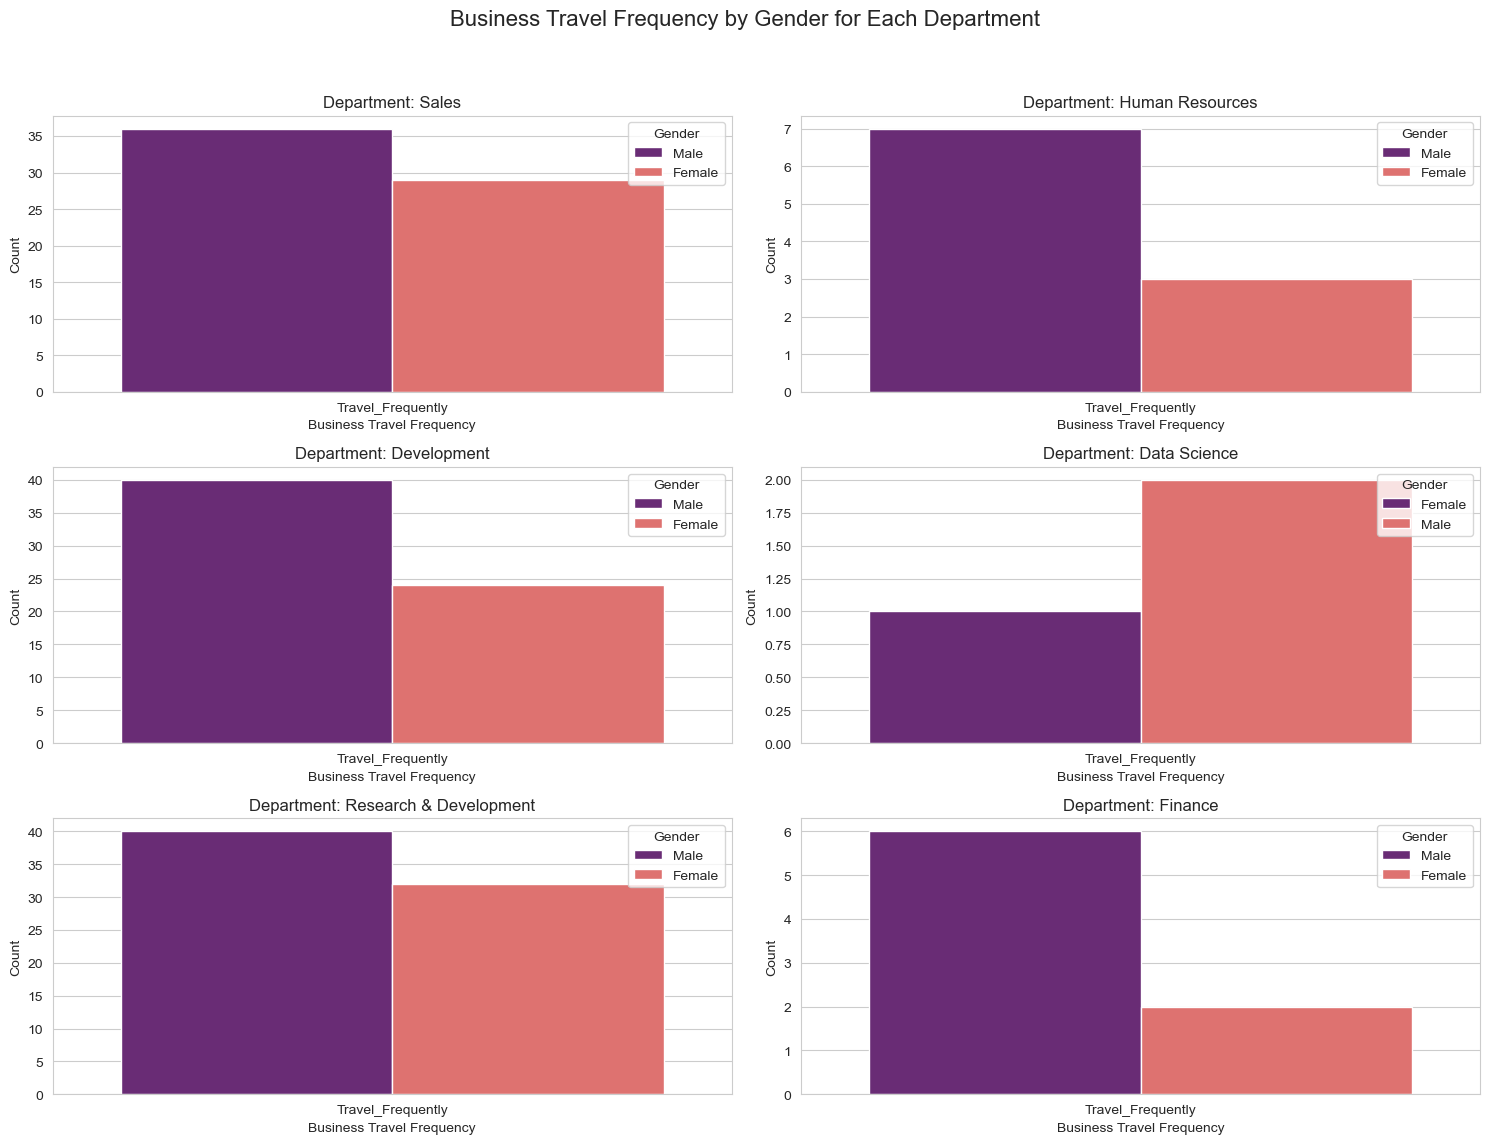

In [68]:
departments = df['EmpDepartment'].unique()

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Business Travel Frequency by Gender for Each Department', fontsize=16)

axes = axes.flatten()

for i, department in enumerate(departments):
    ax = axes[i]
    subset_df = df[(df['BusinessTravelFrequency'] == 'Travel_Frequently') & (df['EmpDepartment'] == department)]
    
    sns.countplot(data=subset_df, x='BusinessTravelFrequency', hue='Gender', palette='magma', ax=ax)
    ax.set_title(f'Department: {department}')
    ax.set_xlabel('Business Travel Frequency')
    ax.set_ylabel('Count')
    ax.legend(title='Gender', loc='upper right')

for i in range(len(departments), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


**Our Insights:** We find that mostly men travel frequently for each department

#### Employee Environment Satisfaction by Performance Rating for Each Department and Gender

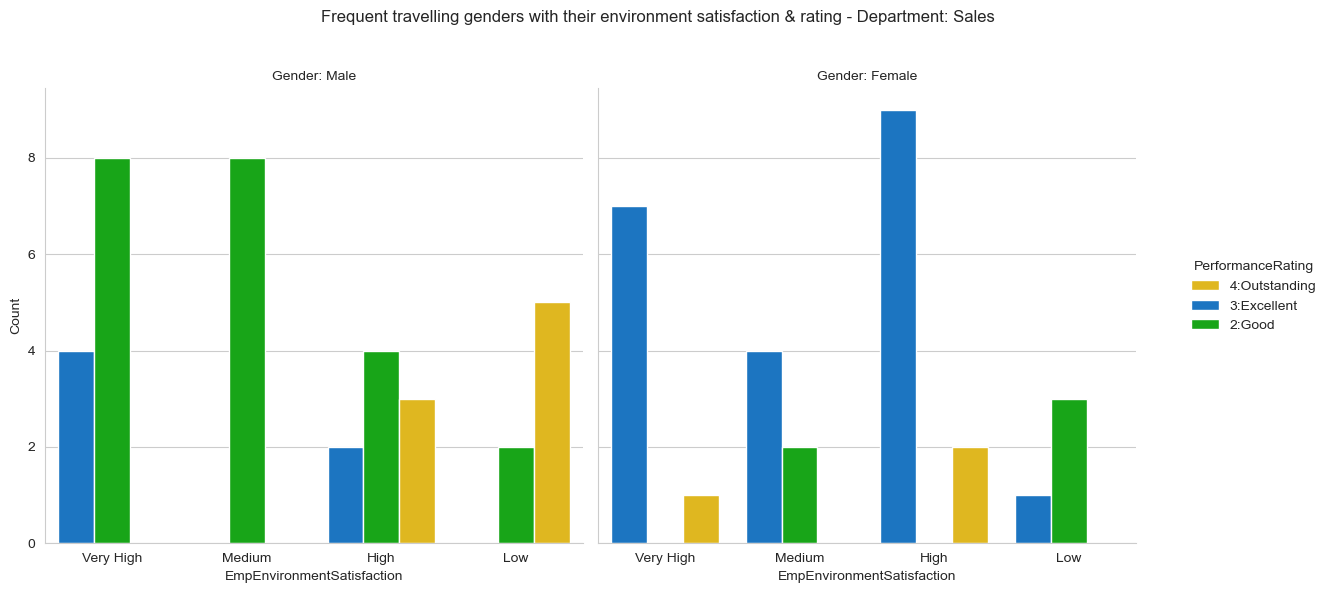

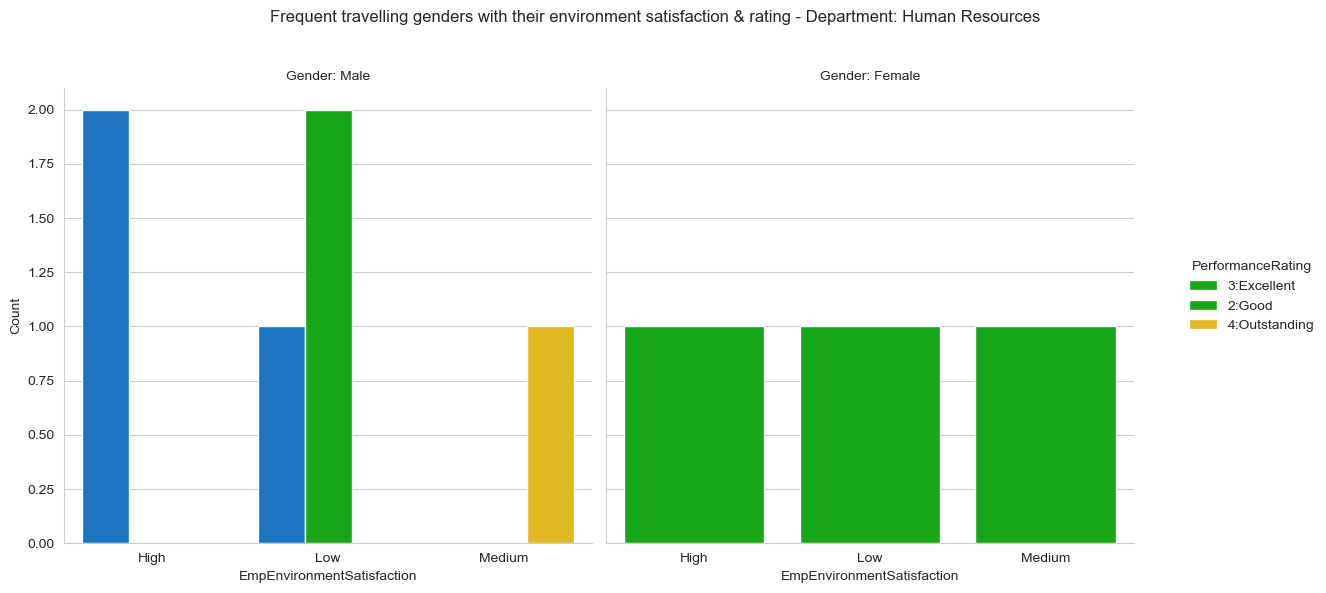

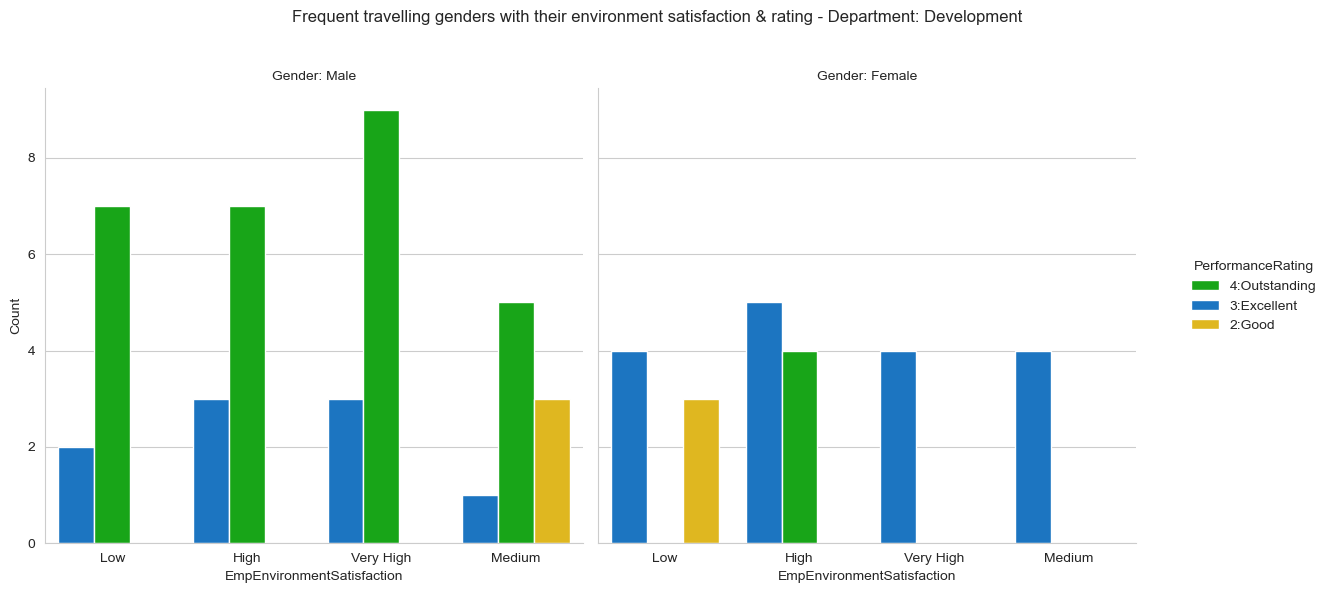

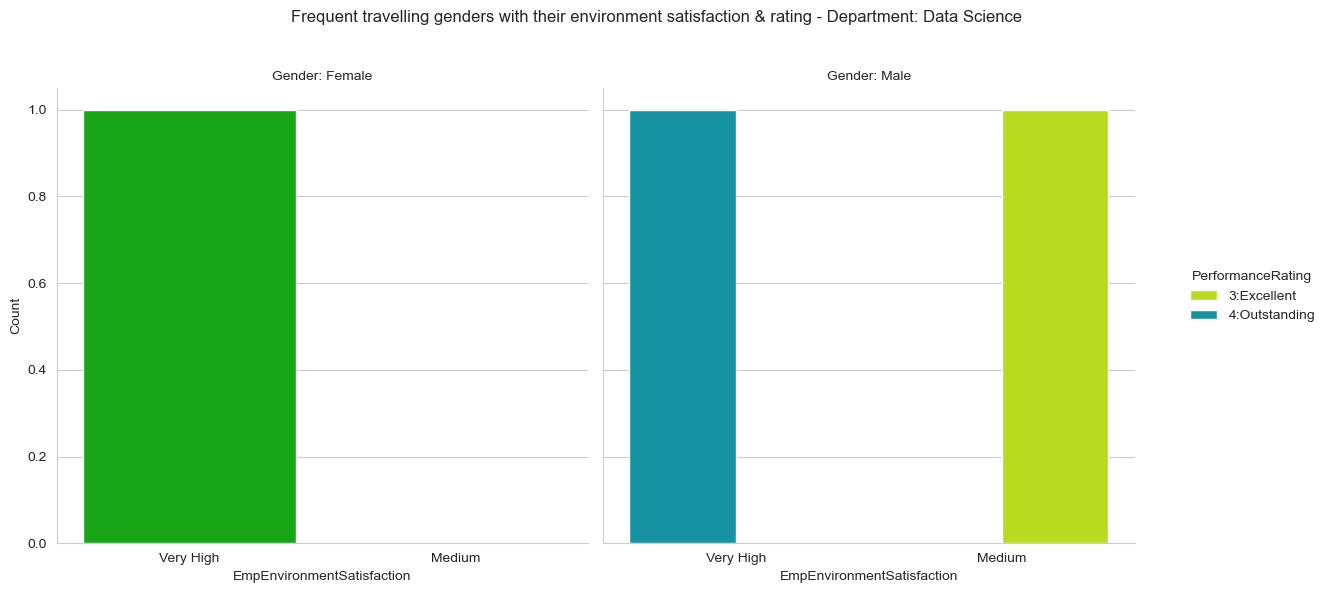

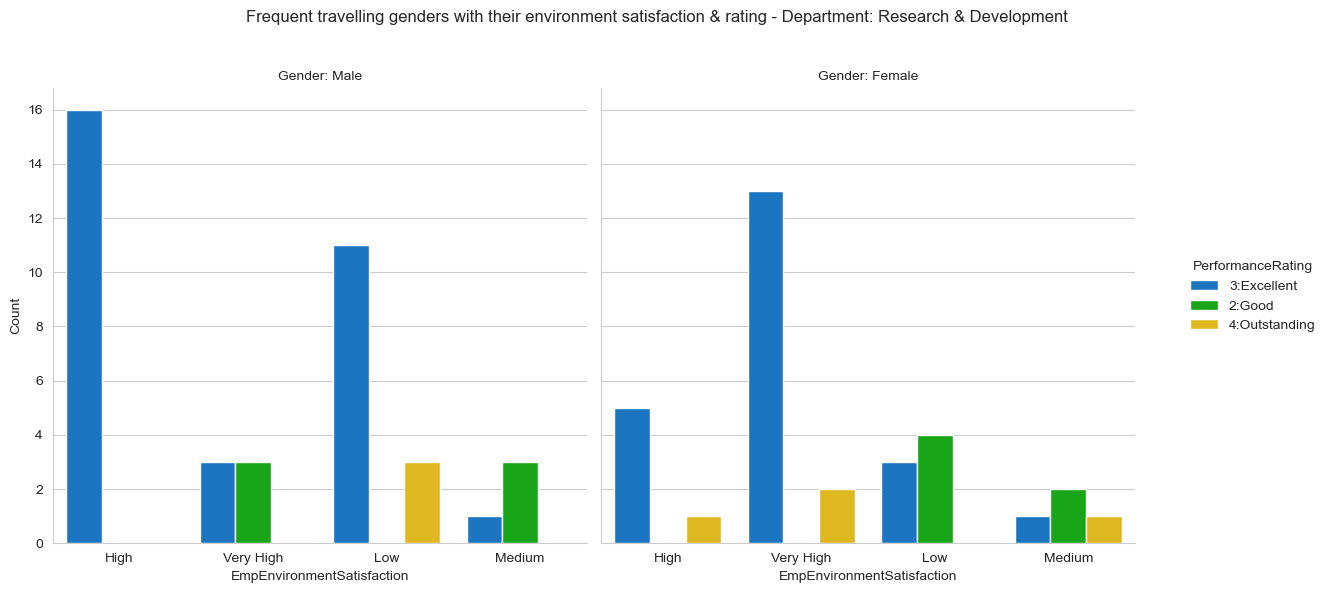

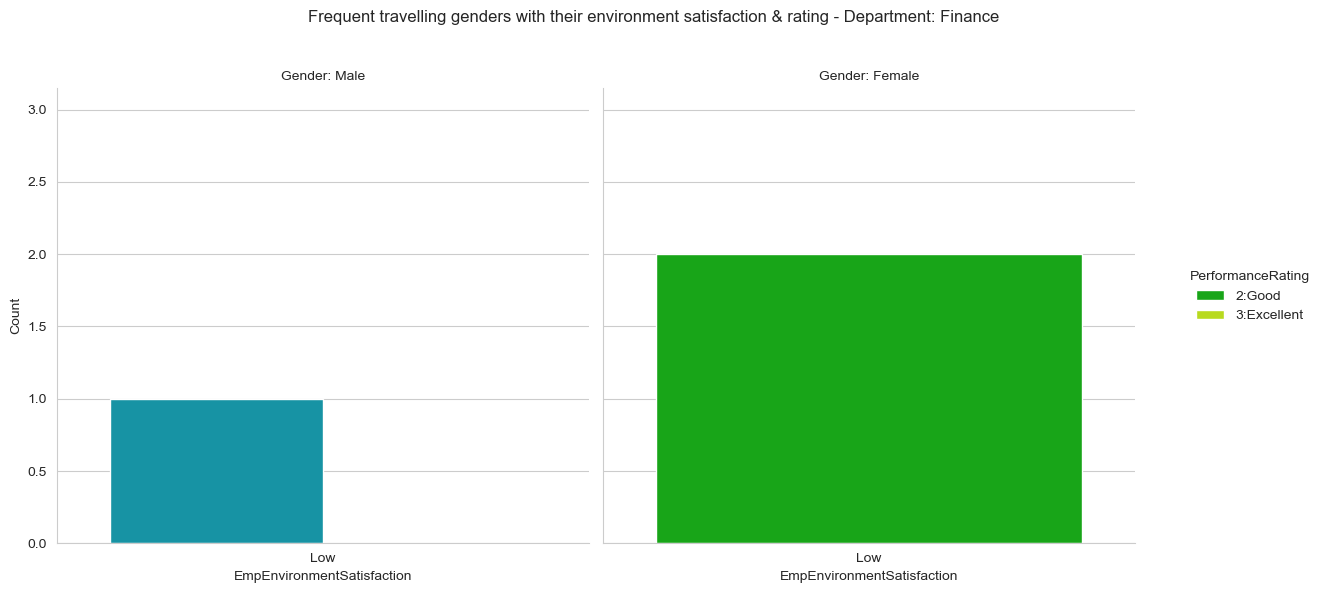

In [69]:
departments = df['EmpDepartment'].unique()

n_rows = 3  
n_cols = 2  

for department in departments:
    subset_df = df[(df['BusinessTravelFrequency'] == 'Travel_Frequently') & (df['EmpDepartment'] == department)]
    
    g = sns.FacetGrid(data=subset_df, col='Gender', height=6, margin_titles=True)
    g.map_dataframe(sns.countplot, x='EmpEnvironmentSatisfaction', hue='PerformanceRating', palette='nipy_spectral')
    g.set_titles(col_template='Gender: {col_name}')
    g.set_axis_labels("EmpEnvironmentSatisfaction", "Count")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Frequent travelling genders with their environment satisfaction & rating - Department: {department}')
    g.add_legend(title='PerformanceRating')
    
    plt.show()


**Our Insights:** We found that most men and women who travel frequently has rated their environment satisfaction level to medium or low even though they were given 'outstanding' rating.

#### Frequent Travelling Genders With Their Marital Status & Rating

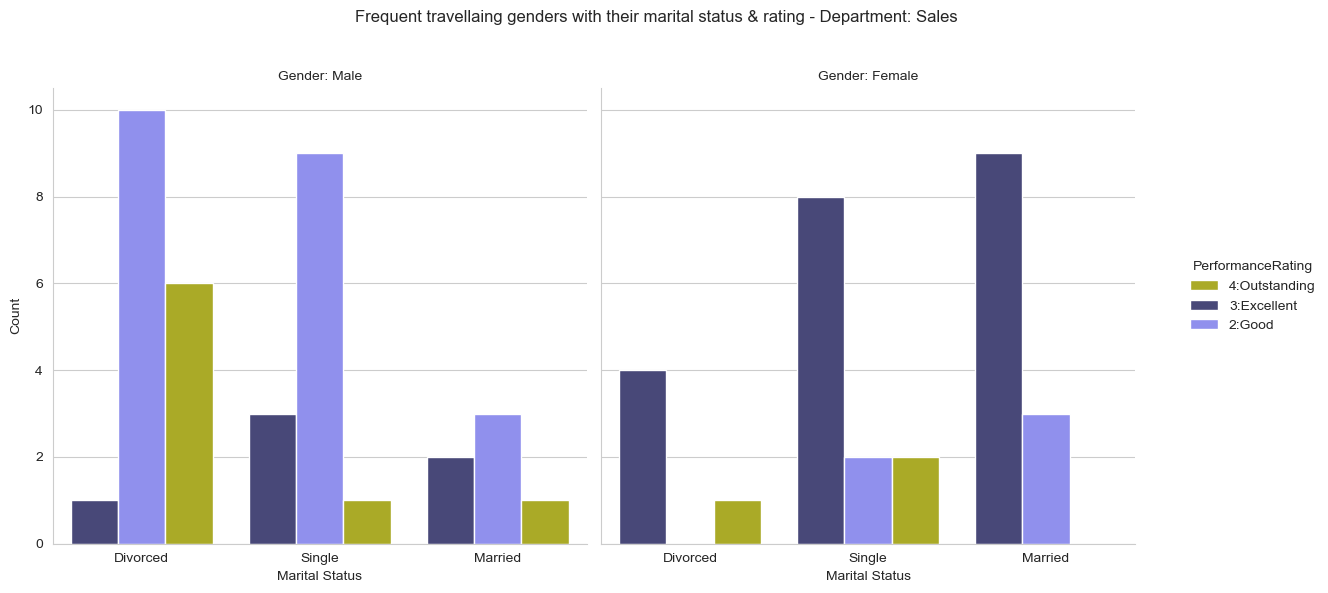

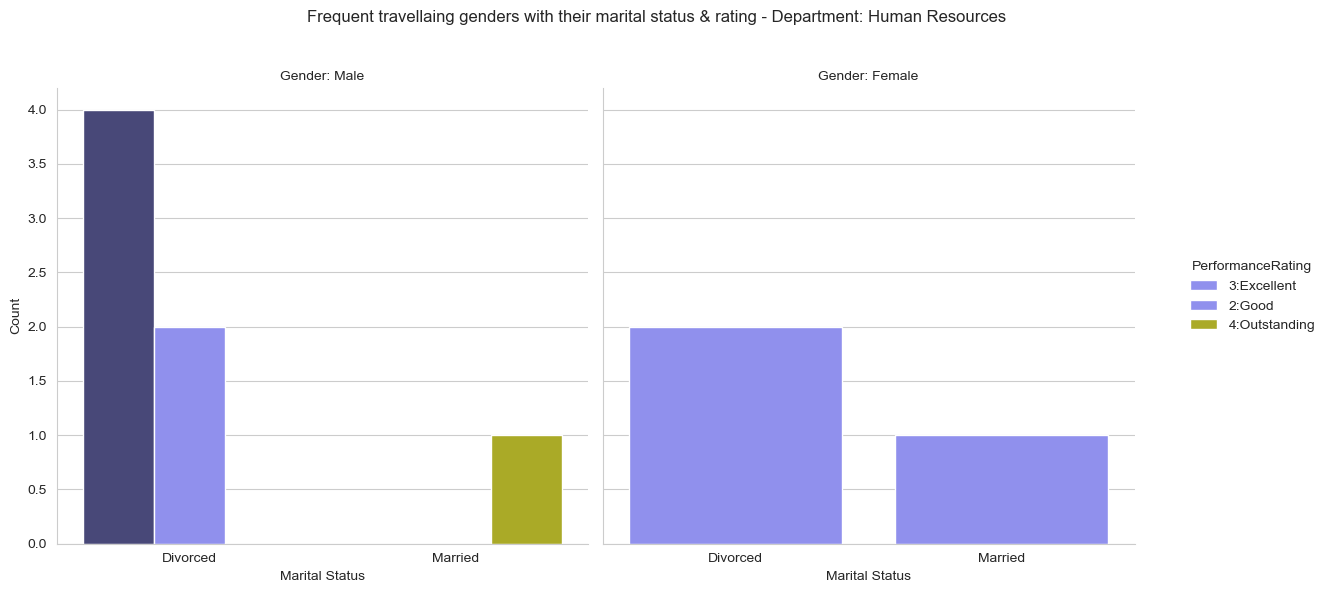

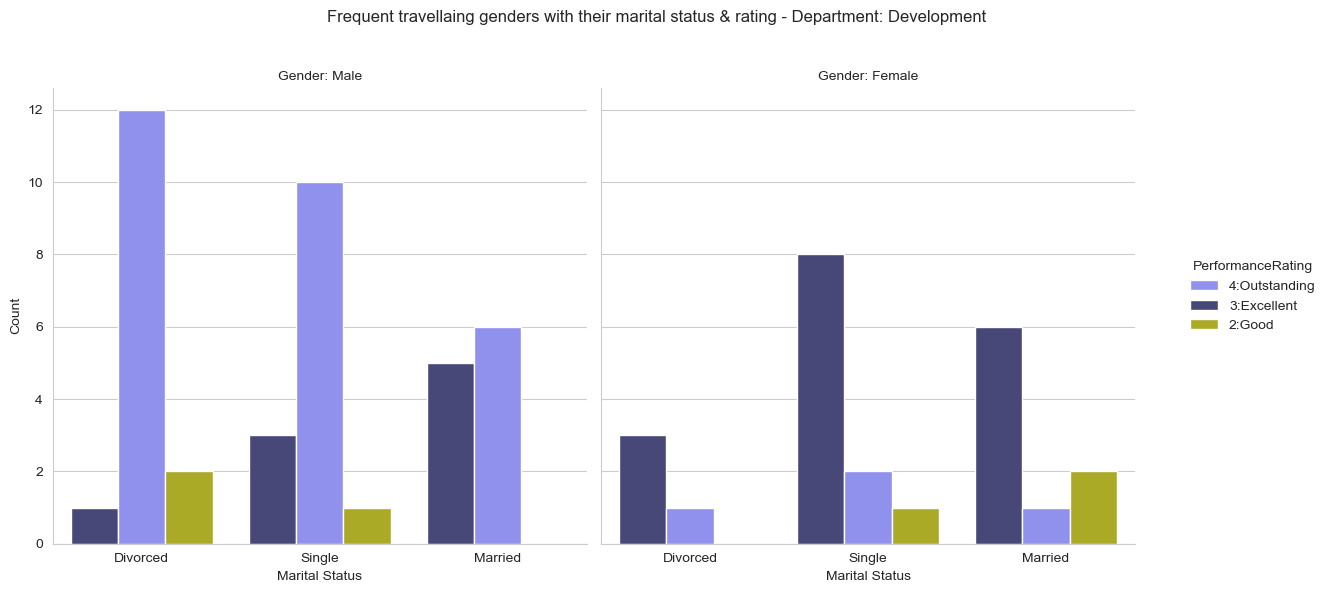

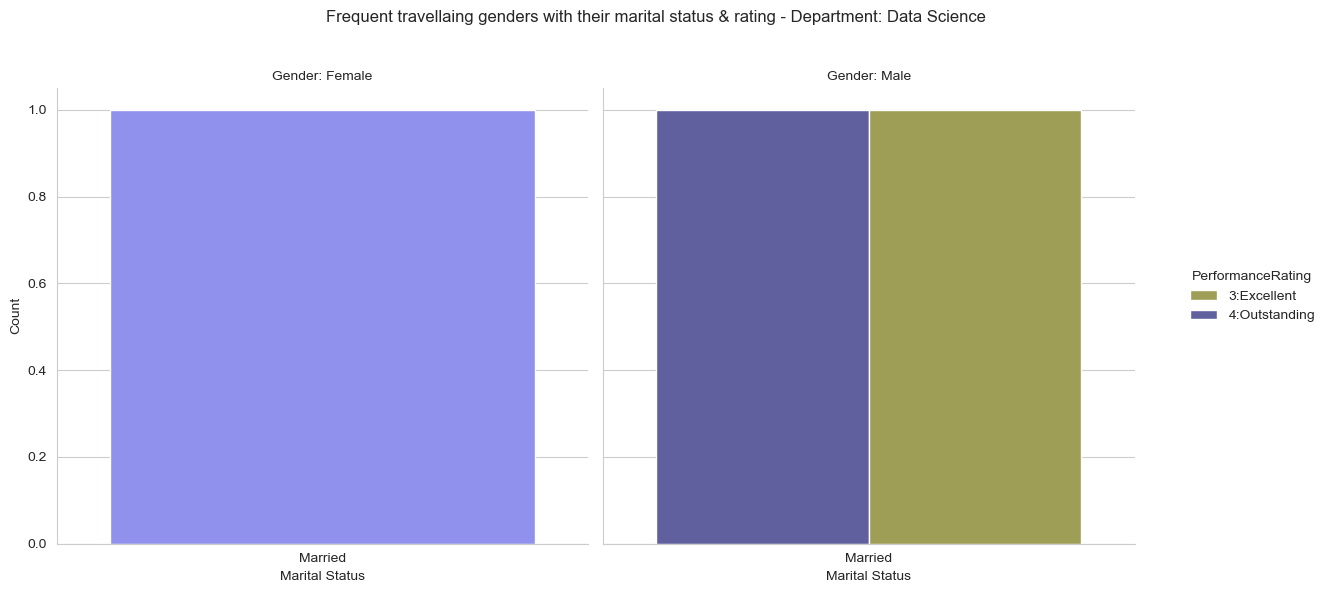

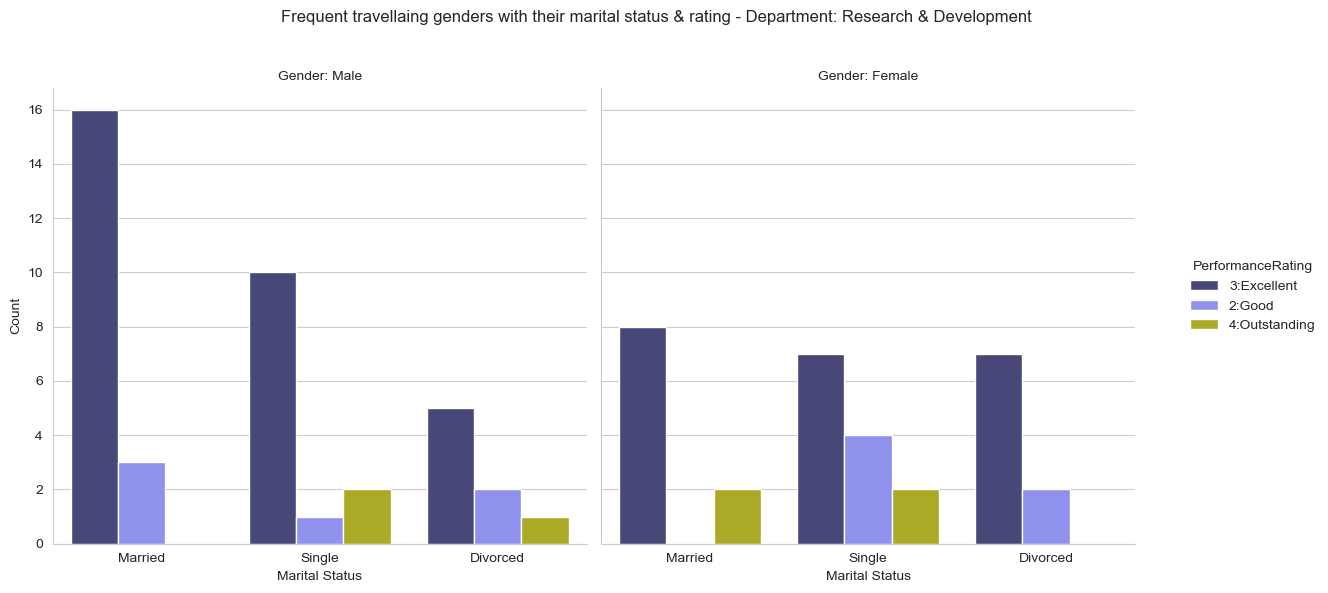

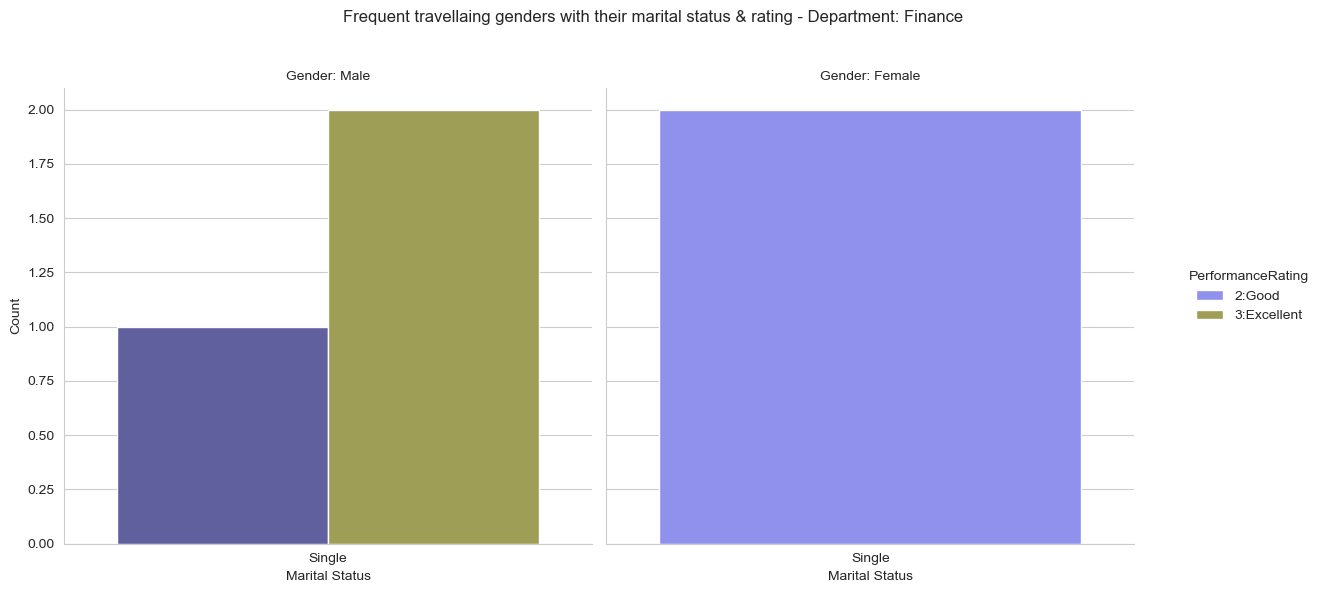

In [70]:
departments = df['EmpDepartment'].unique()

n_rows = 3  
n_cols = 2  

for department in departments:
    subset_df = df[(df['BusinessTravelFrequency'] == 'Travel_Frequently') & (df['EmpDepartment'] == department)]
    
    g = sns.FacetGrid(data=subset_df, col='Gender', height=6, margin_titles=True)
    g.map_dataframe(sns.countplot, x='MaritalStatus', hue='PerformanceRating', palette='gist_stern')
    g.set_titles(col_template='Gender: {col_name}')
    g.set_axis_labels("Marital Status", "Count")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Frequent travellaing genders with their marital status & rating - Department: {department}')
    g.add_legend(title='PerformanceRating')
    
    plt.show()


**Our Insights:** We find that men who travels more frequently are divorced but they got more outstanding rating. On the other hand women who travel frequently are mostly either married or single and they got more 'Excellent' rating.

#### Frequent Travelling Genders With Their Work-life Balance & Performance Rating

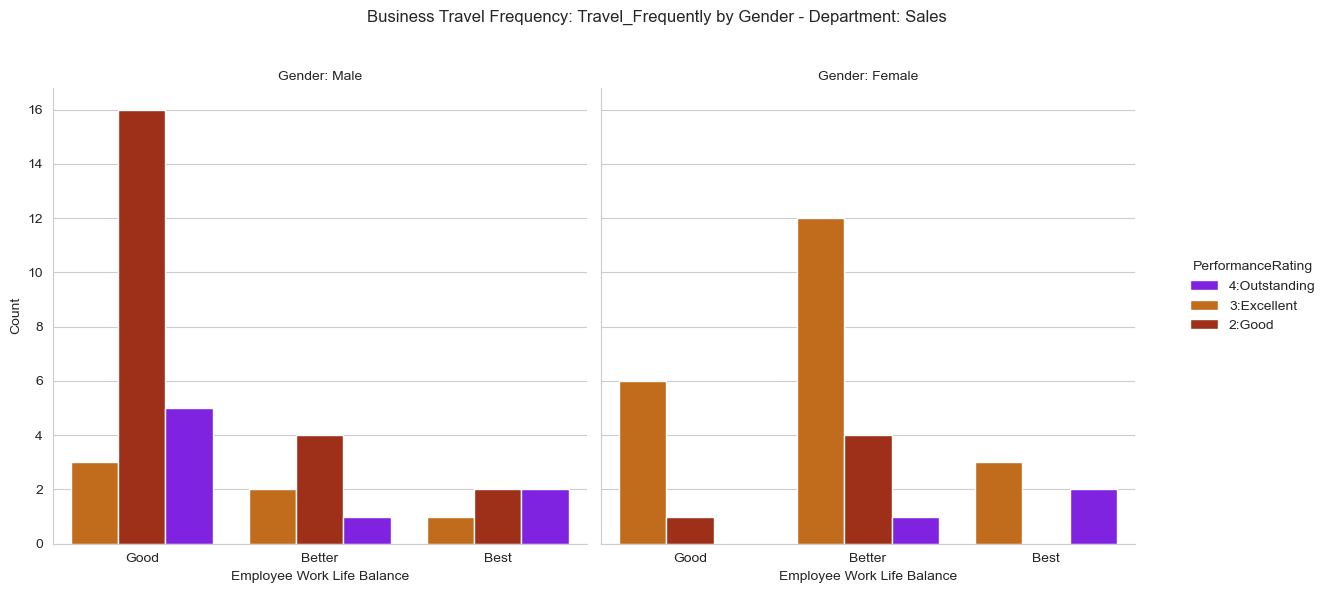

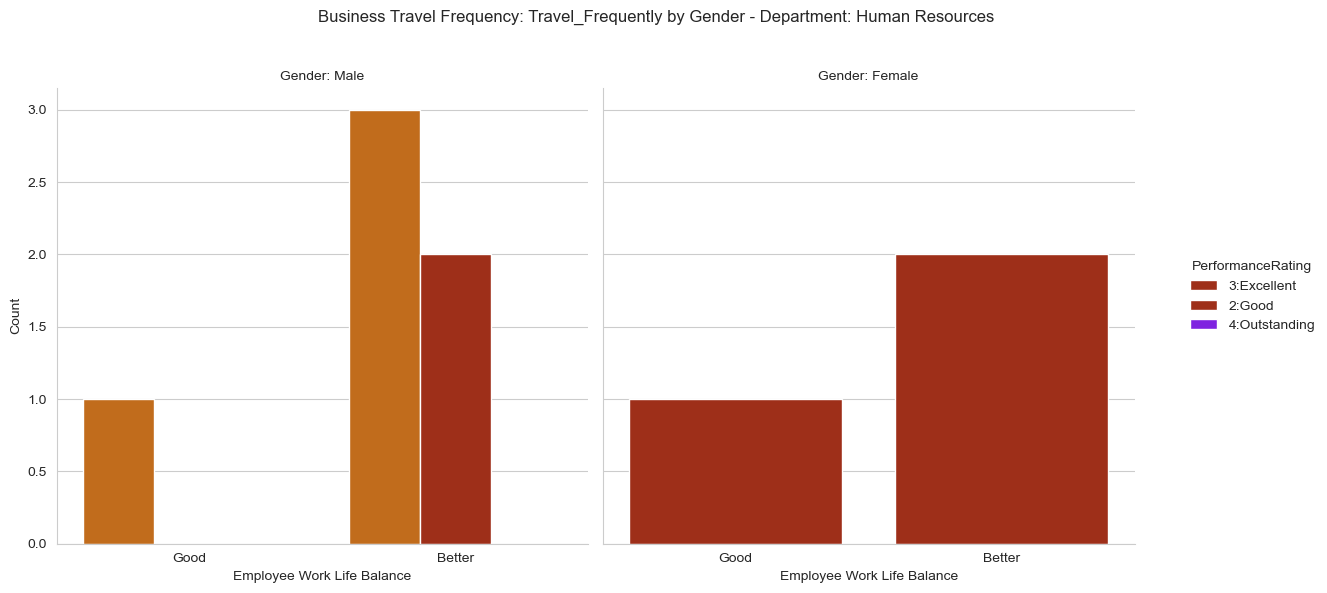

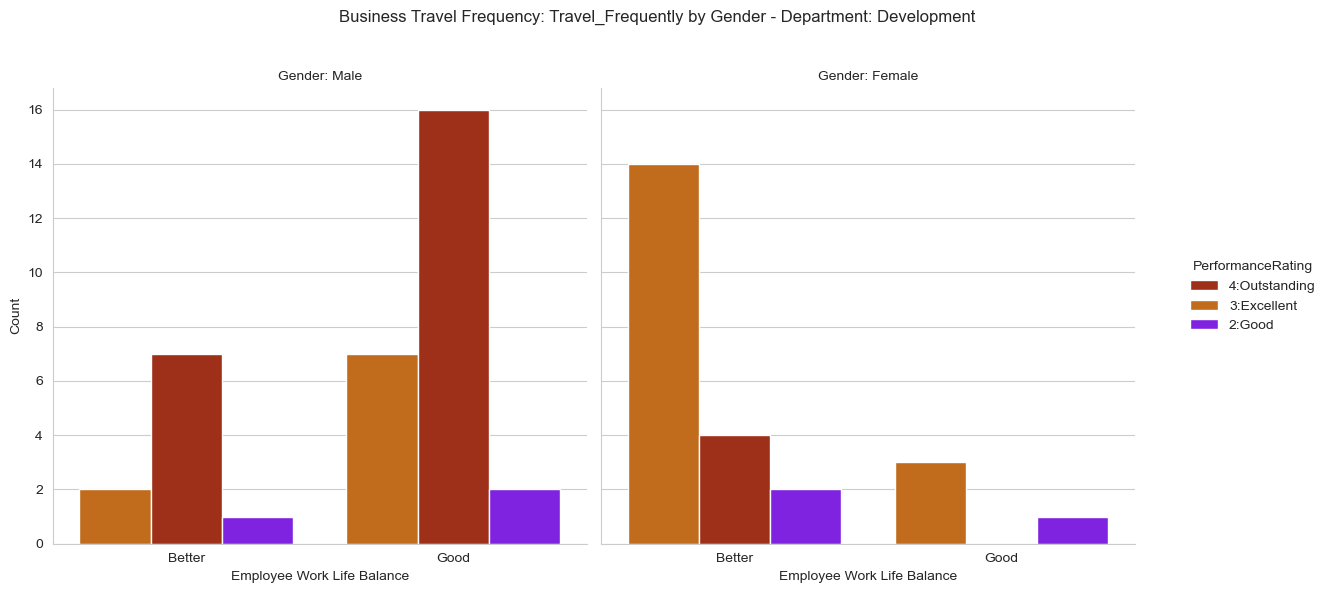

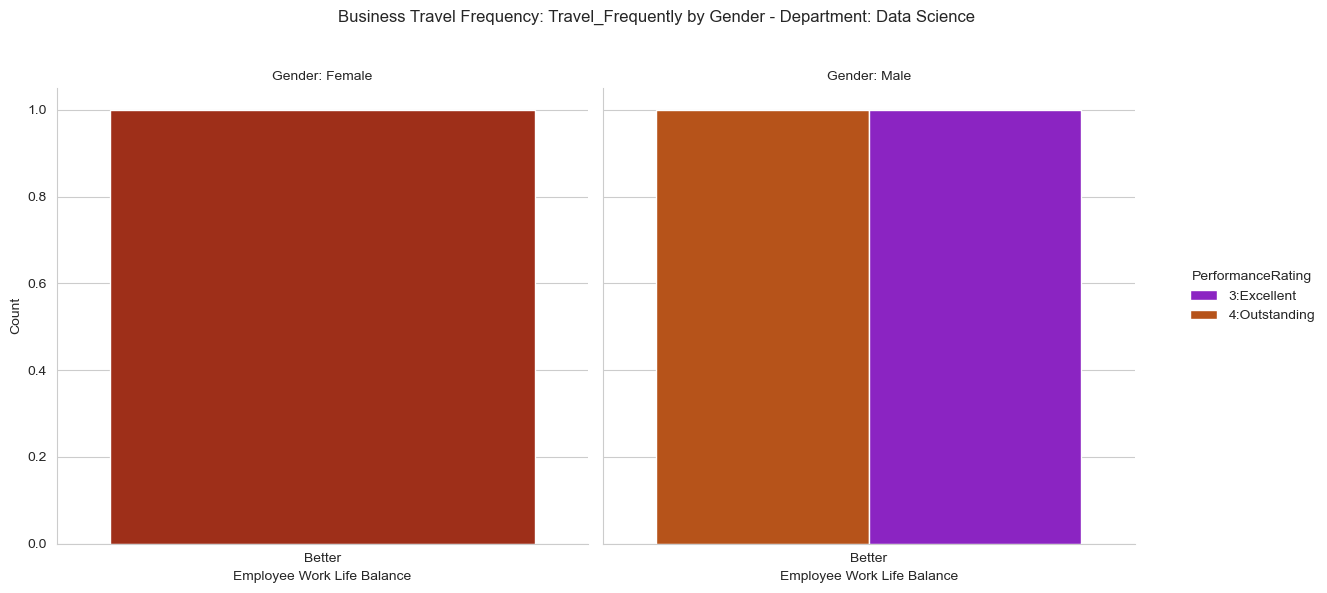

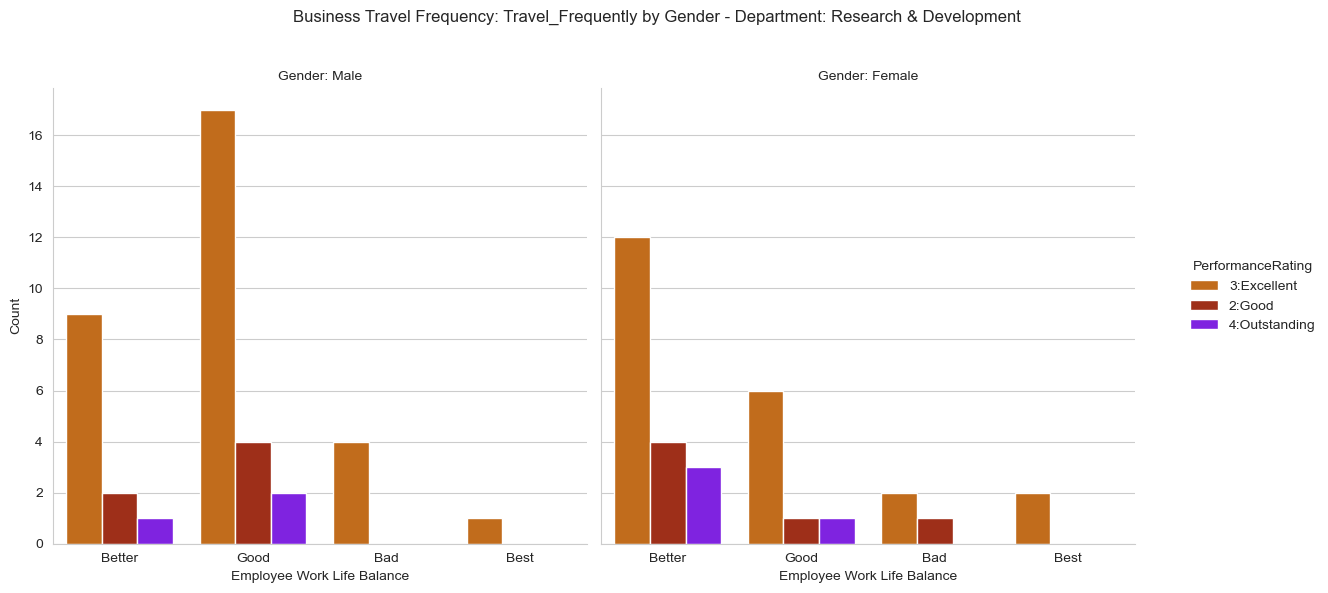

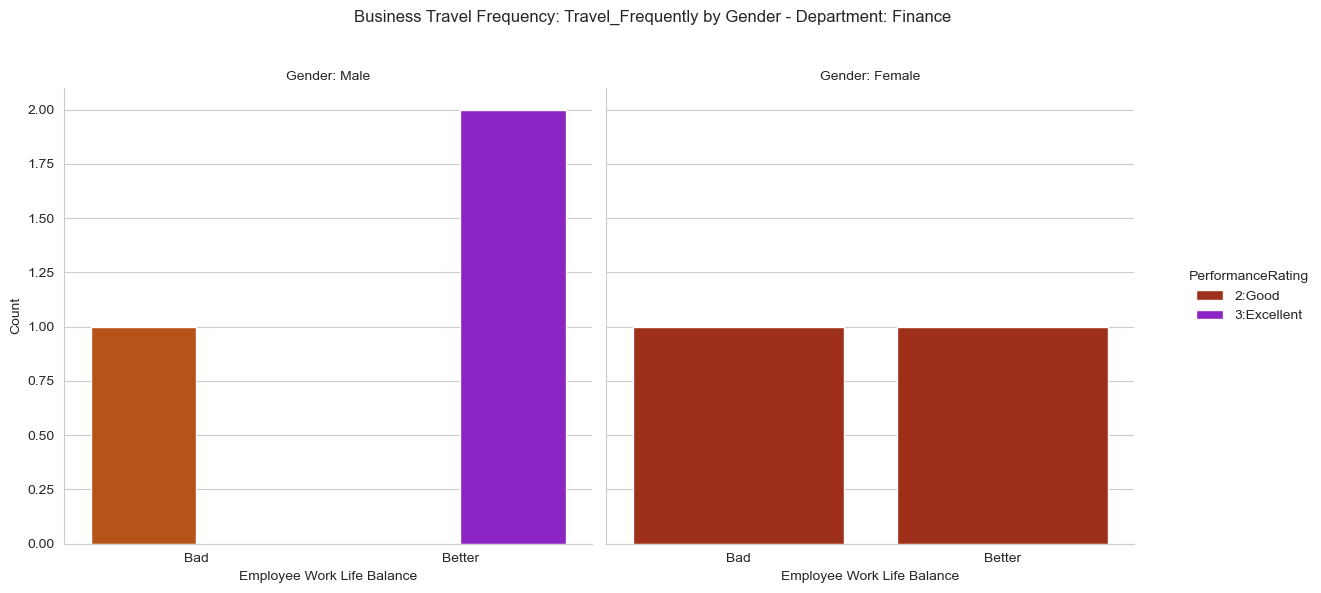

In [71]:
departments = df['EmpDepartment'].unique()

n_rows = 3 
n_cols = 2  

for department in departments:
    subset_df = df[(df['BusinessTravelFrequency'] == 'Travel_Frequently') & (df['EmpDepartment'] == department)]
    
    # Create a new subplot for each department
    g = sns.FacetGrid(data=subset_df, col='Gender', height=6, margin_titles=True)
    g.map_dataframe(sns.countplot, x='EmpWorkLifeBalance', hue='PerformanceRating', palette='gnuplot_r')
    g.set_titles(col_template='Gender: {col_name}')
    g.set_axis_labels("Employee Work Life Balance", "Count")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Business Travel Frequency: Travel_Frequently by Gender - Department: {department}')
    g.add_legend(title='PerformanceRating')
    
    plt.show()



**Our Insights:** 
Very few frequent travelling males and females have rated their worklife balance as 'best'.

Only in sales and R&D department, employees feel that they have the 'best' work-life balance. 

In most of  the department, employees who got outstanding rating has rated their work-life balance as either 'Good' or 'Bad'.

#### Departmentwise Employees Educational Background with Performance Rating

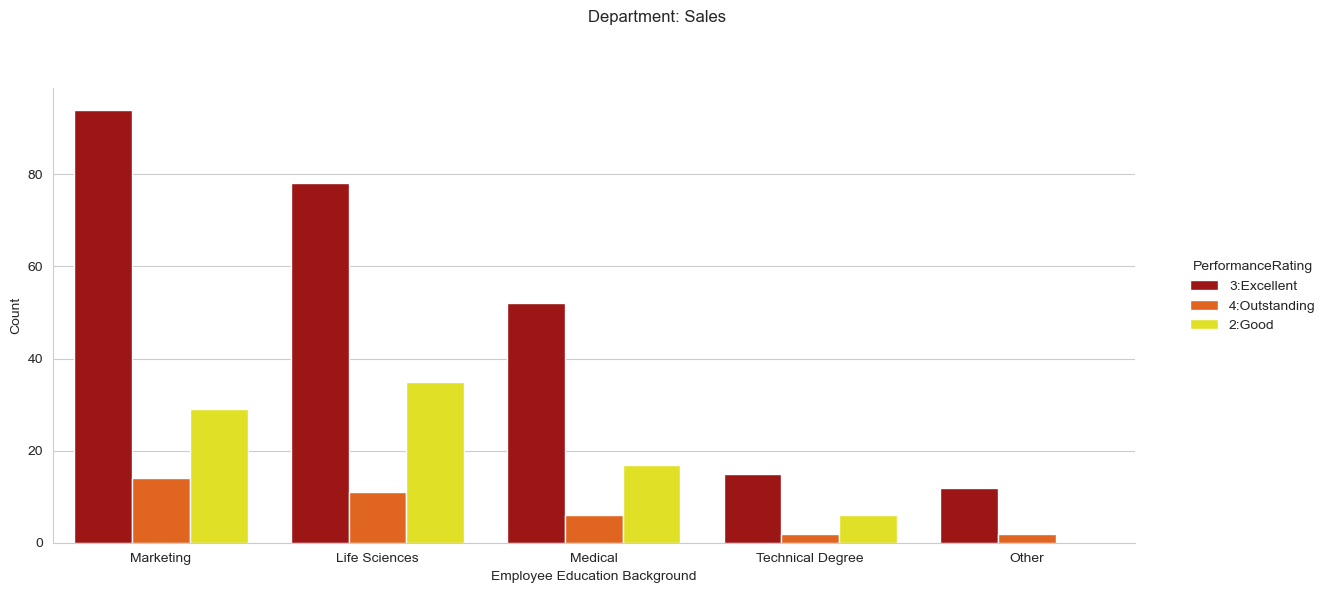

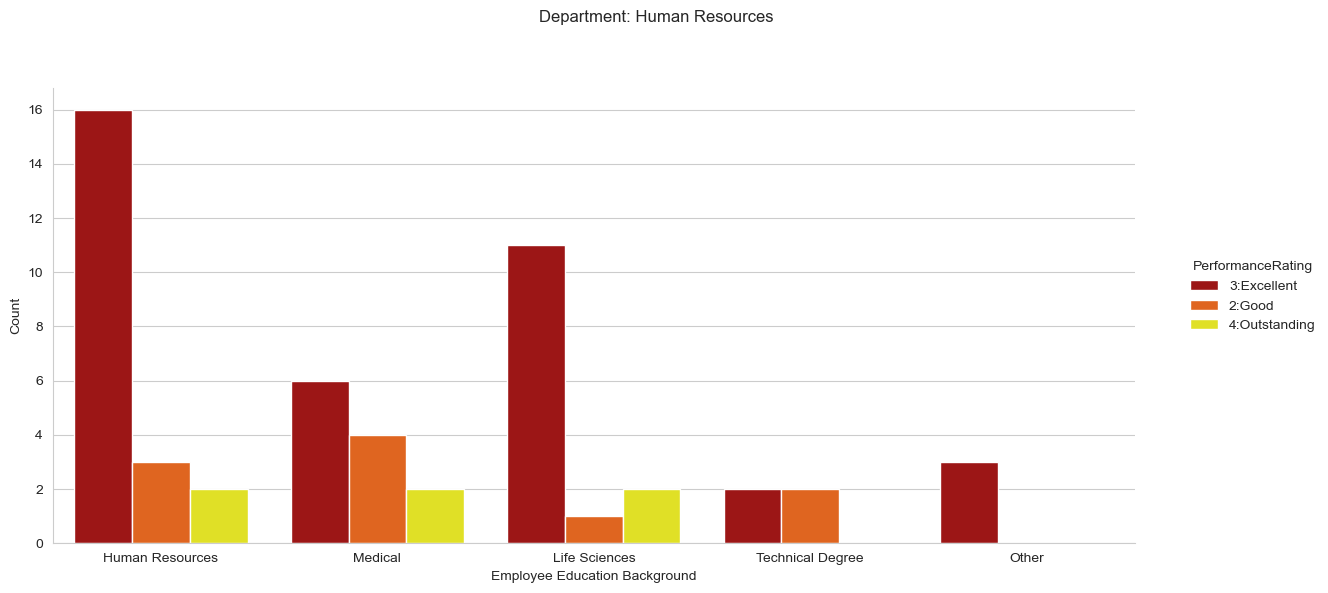

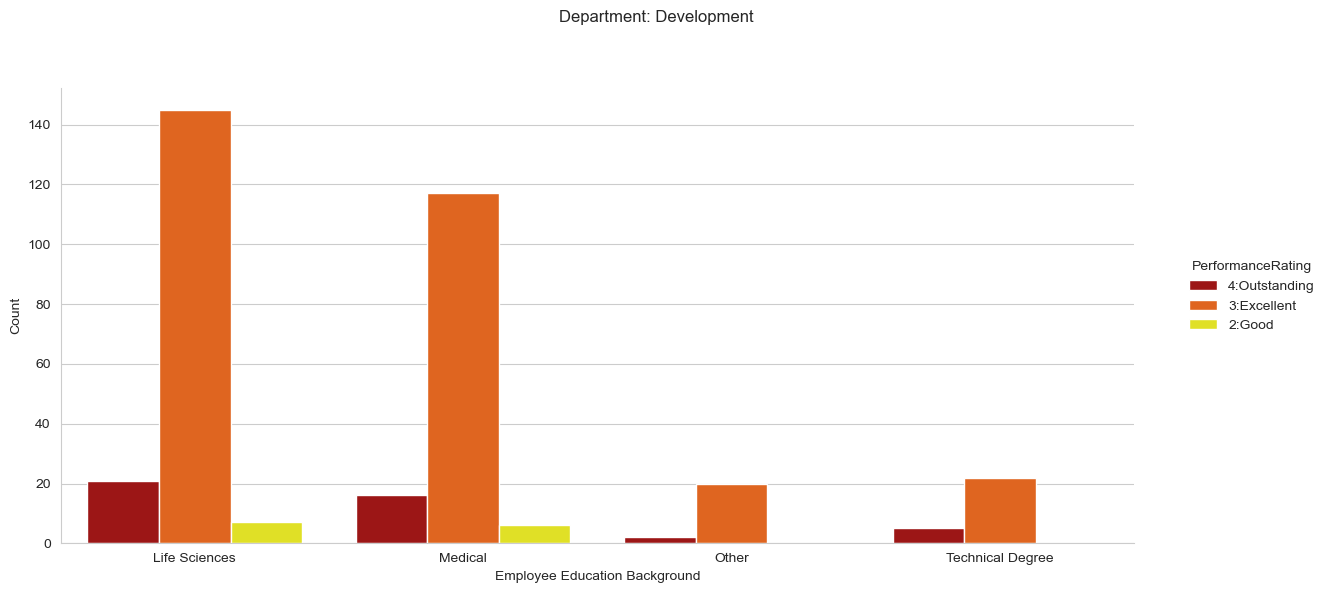

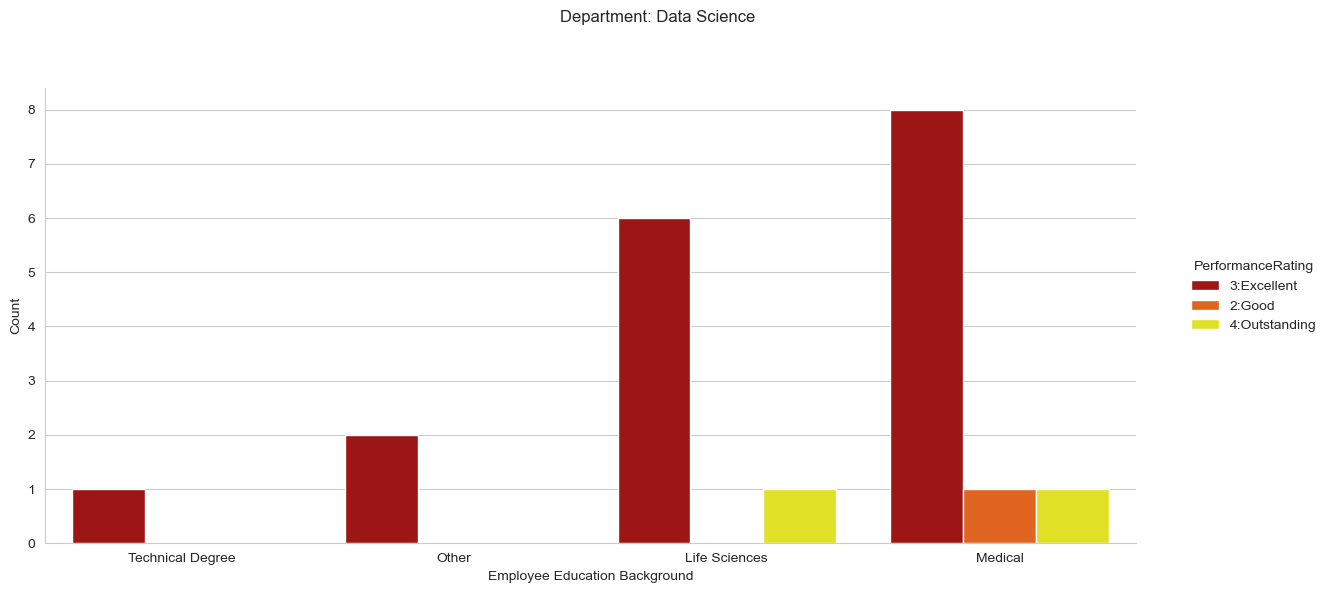

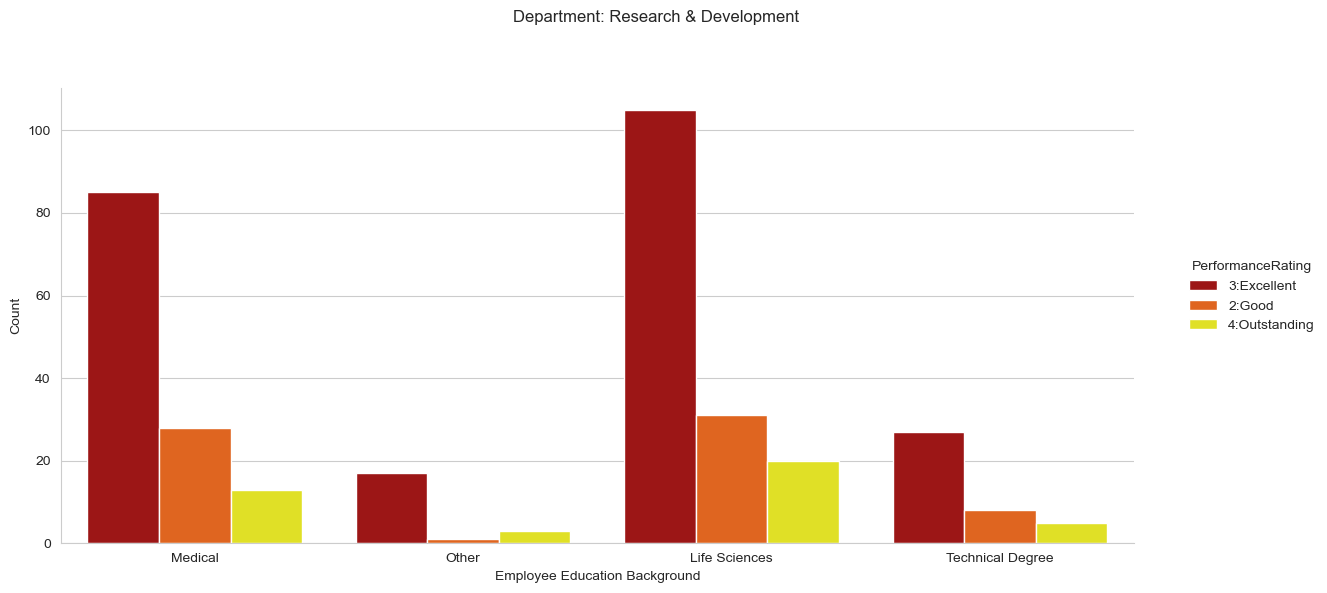

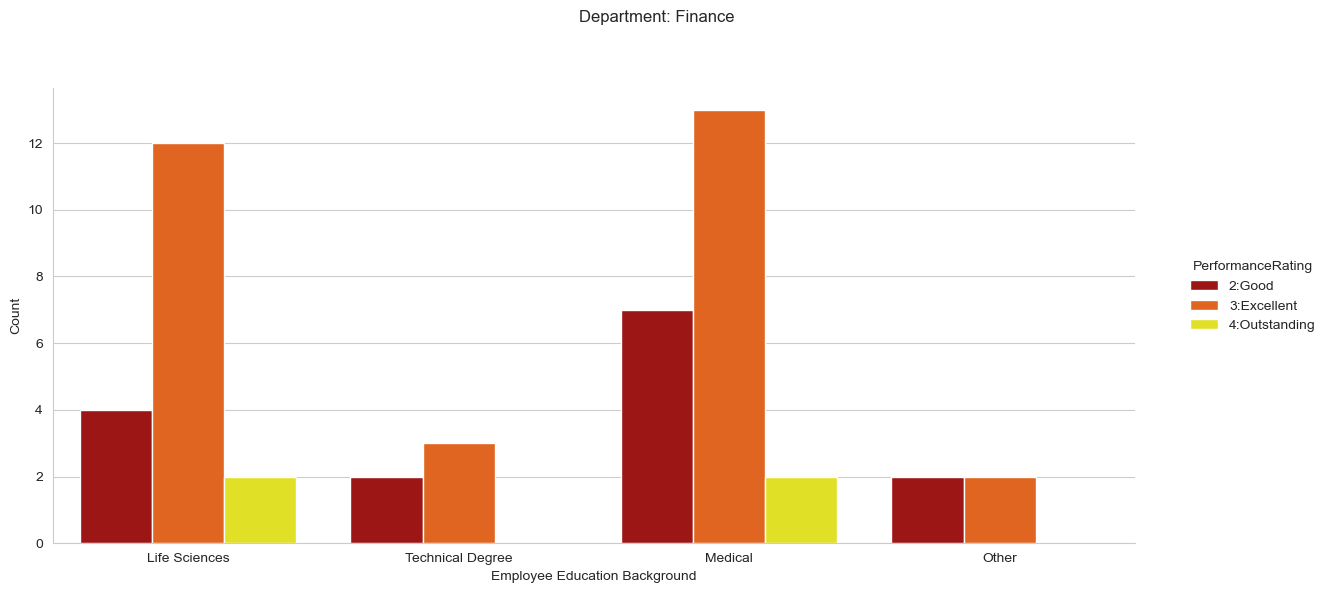

In [72]:
departments = df['EmpDepartment'].unique()

n_rows = 3
n_cols = 2

for department in departments:
    subset_df = df[df['EmpDepartment'] == department]
    g = sns.FacetGrid(data=subset_df, height=6, aspect=2.0, margin_titles=True)
    g.map_dataframe(sns.countplot, x='EducationBackground', hue='PerformanceRating', palette='hot')
    g.set_titles(col_template='Department: {col_name}')
    g.set_axis_labels("Employee Education Background", "Count")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Department: {department}')
    g.add_legend(title='PerformanceRating')
    
    plt.show()


**Our Insights:**
We see that in sales & humnan resources department most of the employees have background of marketing & human resource repectively and most of these employees are given outstanding or excellent rating.

R&D and development department has more people from life science and medical background; and most of these employees got excellent rating.

Finally. Data Science and Finance department has more employees from life scince and medical background and these employees got excellent rating.

#### Visualizing Employees Years Since last Promotion And Their Satisfation

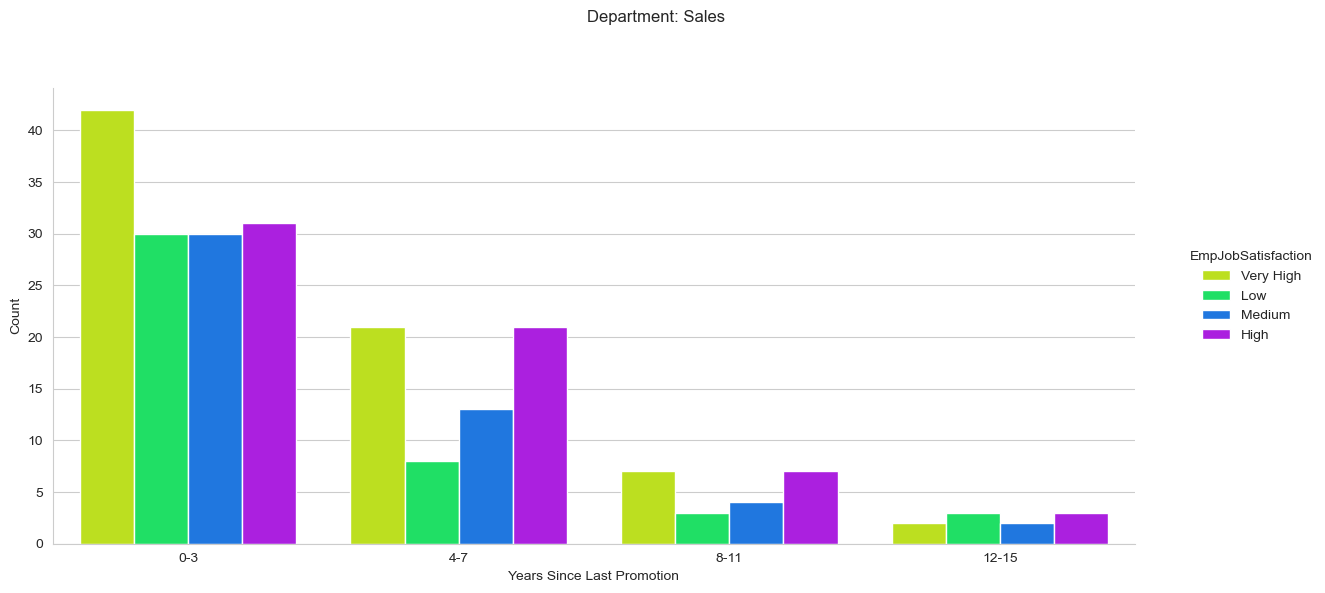

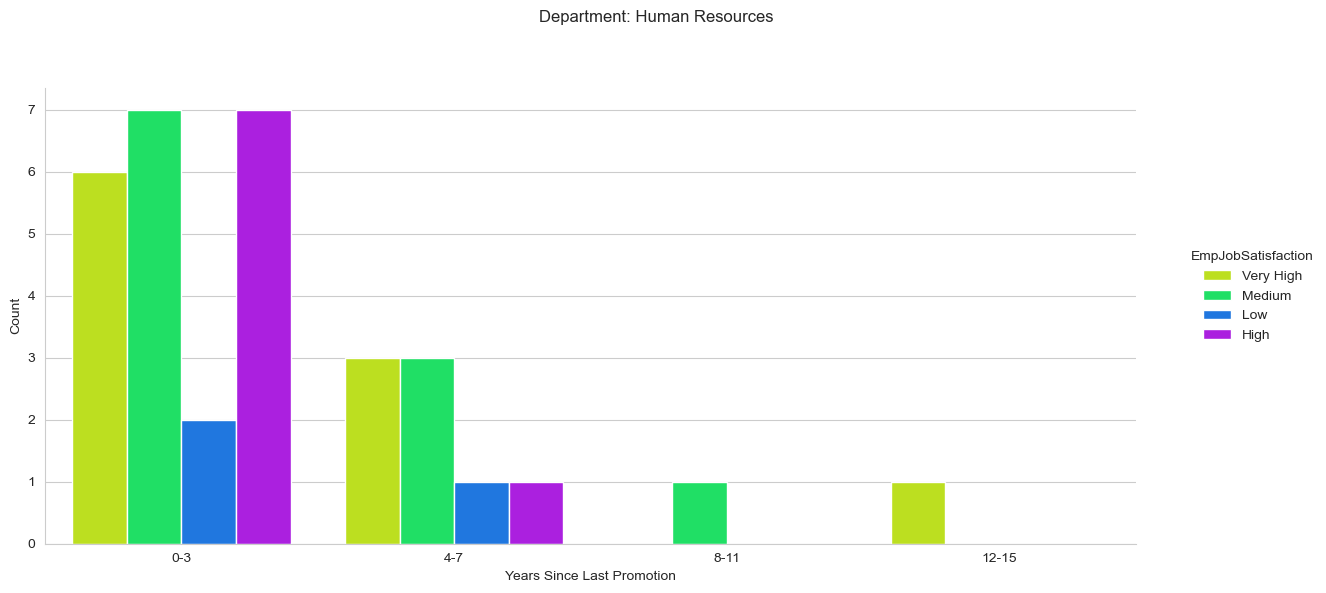

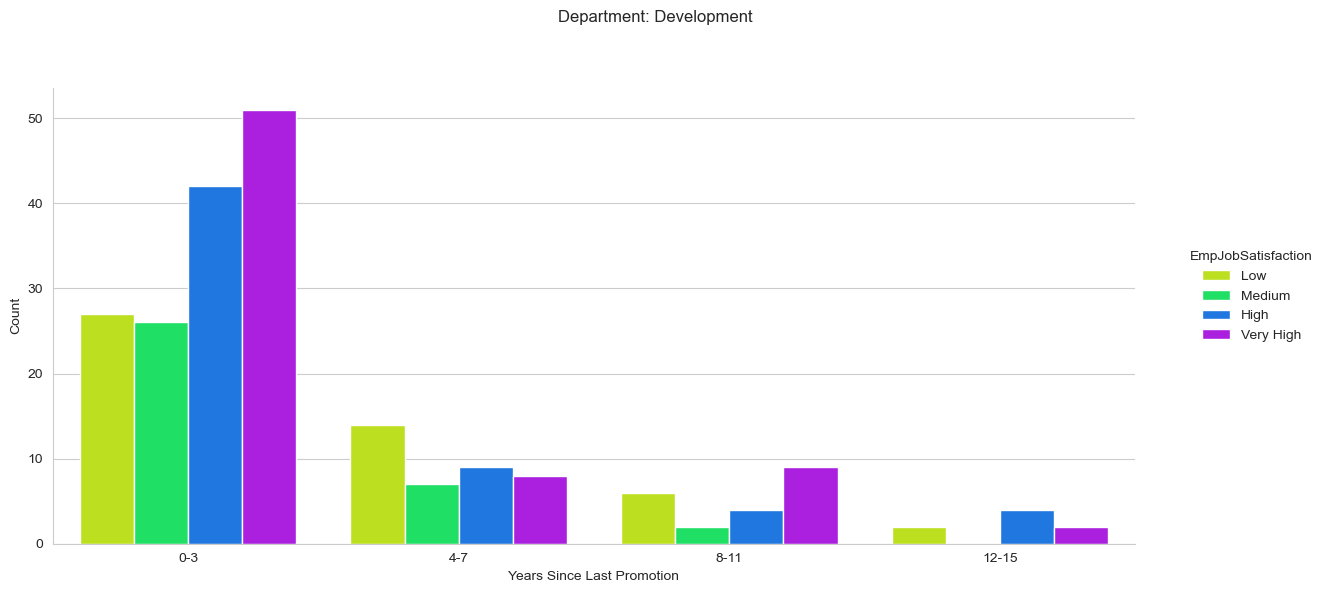

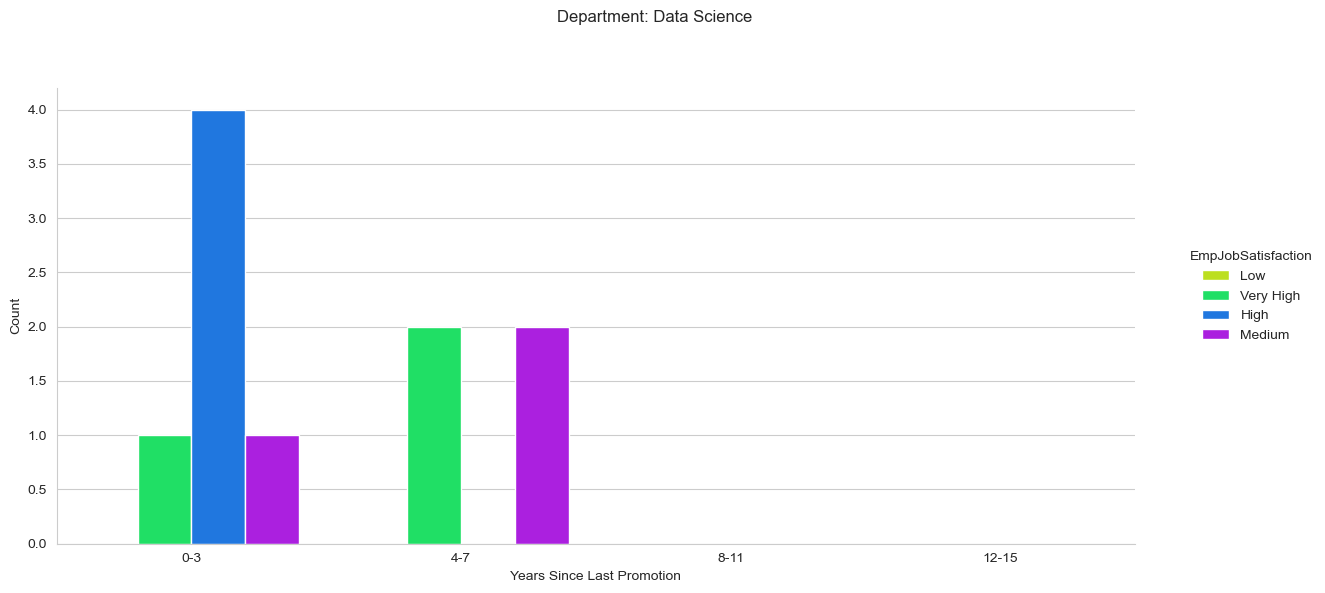

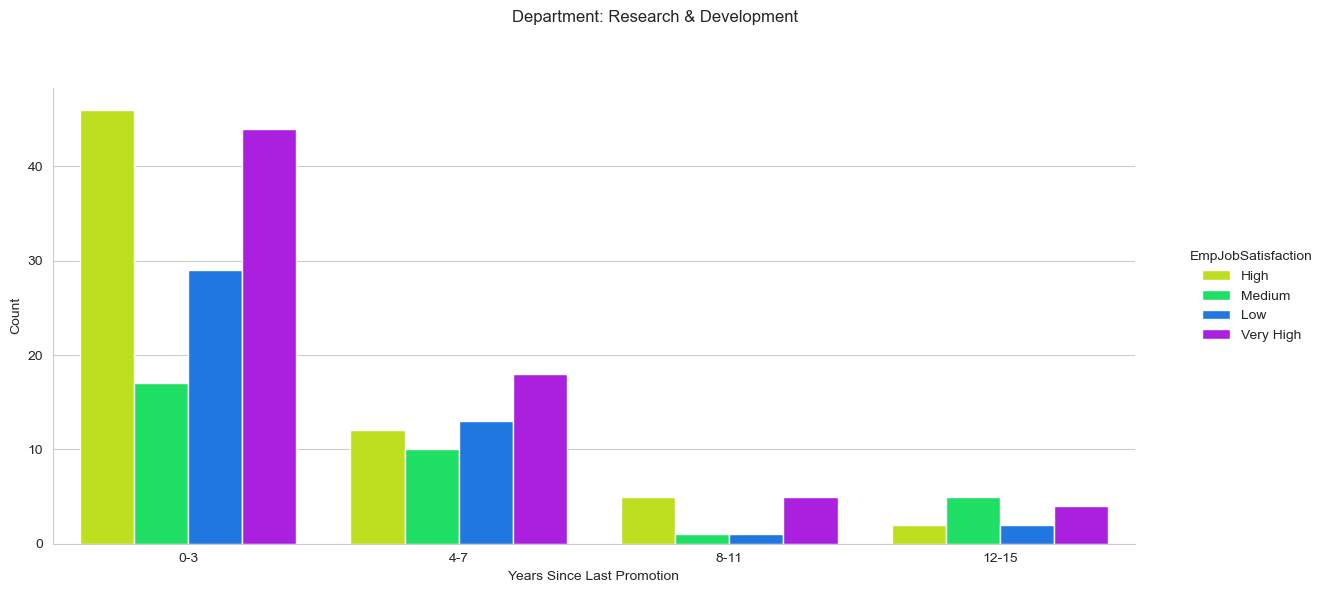

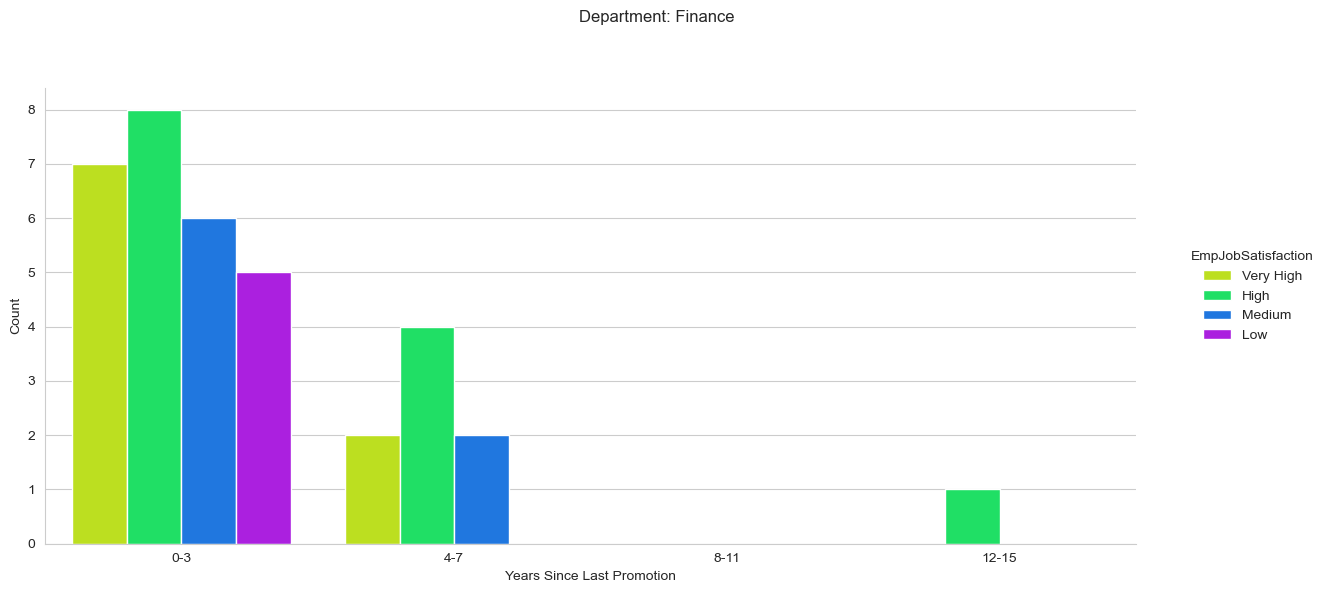

In [73]:
bins = [0, 3, 7, 11, 15]
bin_labels = ['0-3', '4-7', '8-11', '12-15']
df['YearsSinceLastPromotionBin'] = pd.cut(df['YearsSinceLastPromotion'], bins=bins, labels=bin_labels)
departments = df['EmpDepartment'].unique()

n_rows = 3
n_cols = 2

for department in departments:
    subset_df = df[df['EmpDepartment'] == department]
    g = sns.FacetGrid(data=subset_df, height=6, aspect=2.0, margin_titles=True)
    g.map_dataframe(sns.countplot, x='YearsSinceLastPromotionBin', hue='EmpJobSatisfaction', palette='hsv')
    g.set_titles(col_template='Department: {col_name}')
    g.set_axis_labels("Years Since Last Promotion", "Count")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Department: {department}')
    g.add_legend(title='EmpJobSatisfaction')
    
    plt.show()


**Our Insights:** It is obvious that employees with less years passed to promotion have rated their job satisfaction as high and vice versa.

## Multivariate Analysis

In [74]:
class_mapping = {
    '3:Excellent': 3,
    '2:Good': 2,
    '4:Outstanding': 4
}

df['PerformanceRating'] = df['PerformanceRating'].map(class_mapping)


In [75]:
from scipy.stats import pearsonr
corr_matrix = df.corr()
corr_values = corr_matrix['PerformanceRating'][:-1]
print(corr_values.sort_values(ascending=False))

EmpLastSalaryHikePercent        0.333722
NumCompaniesWorked              0.020980
TrainingTimesLastYear          -0.005443
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
Name: PerformanceRating, dtype: float64


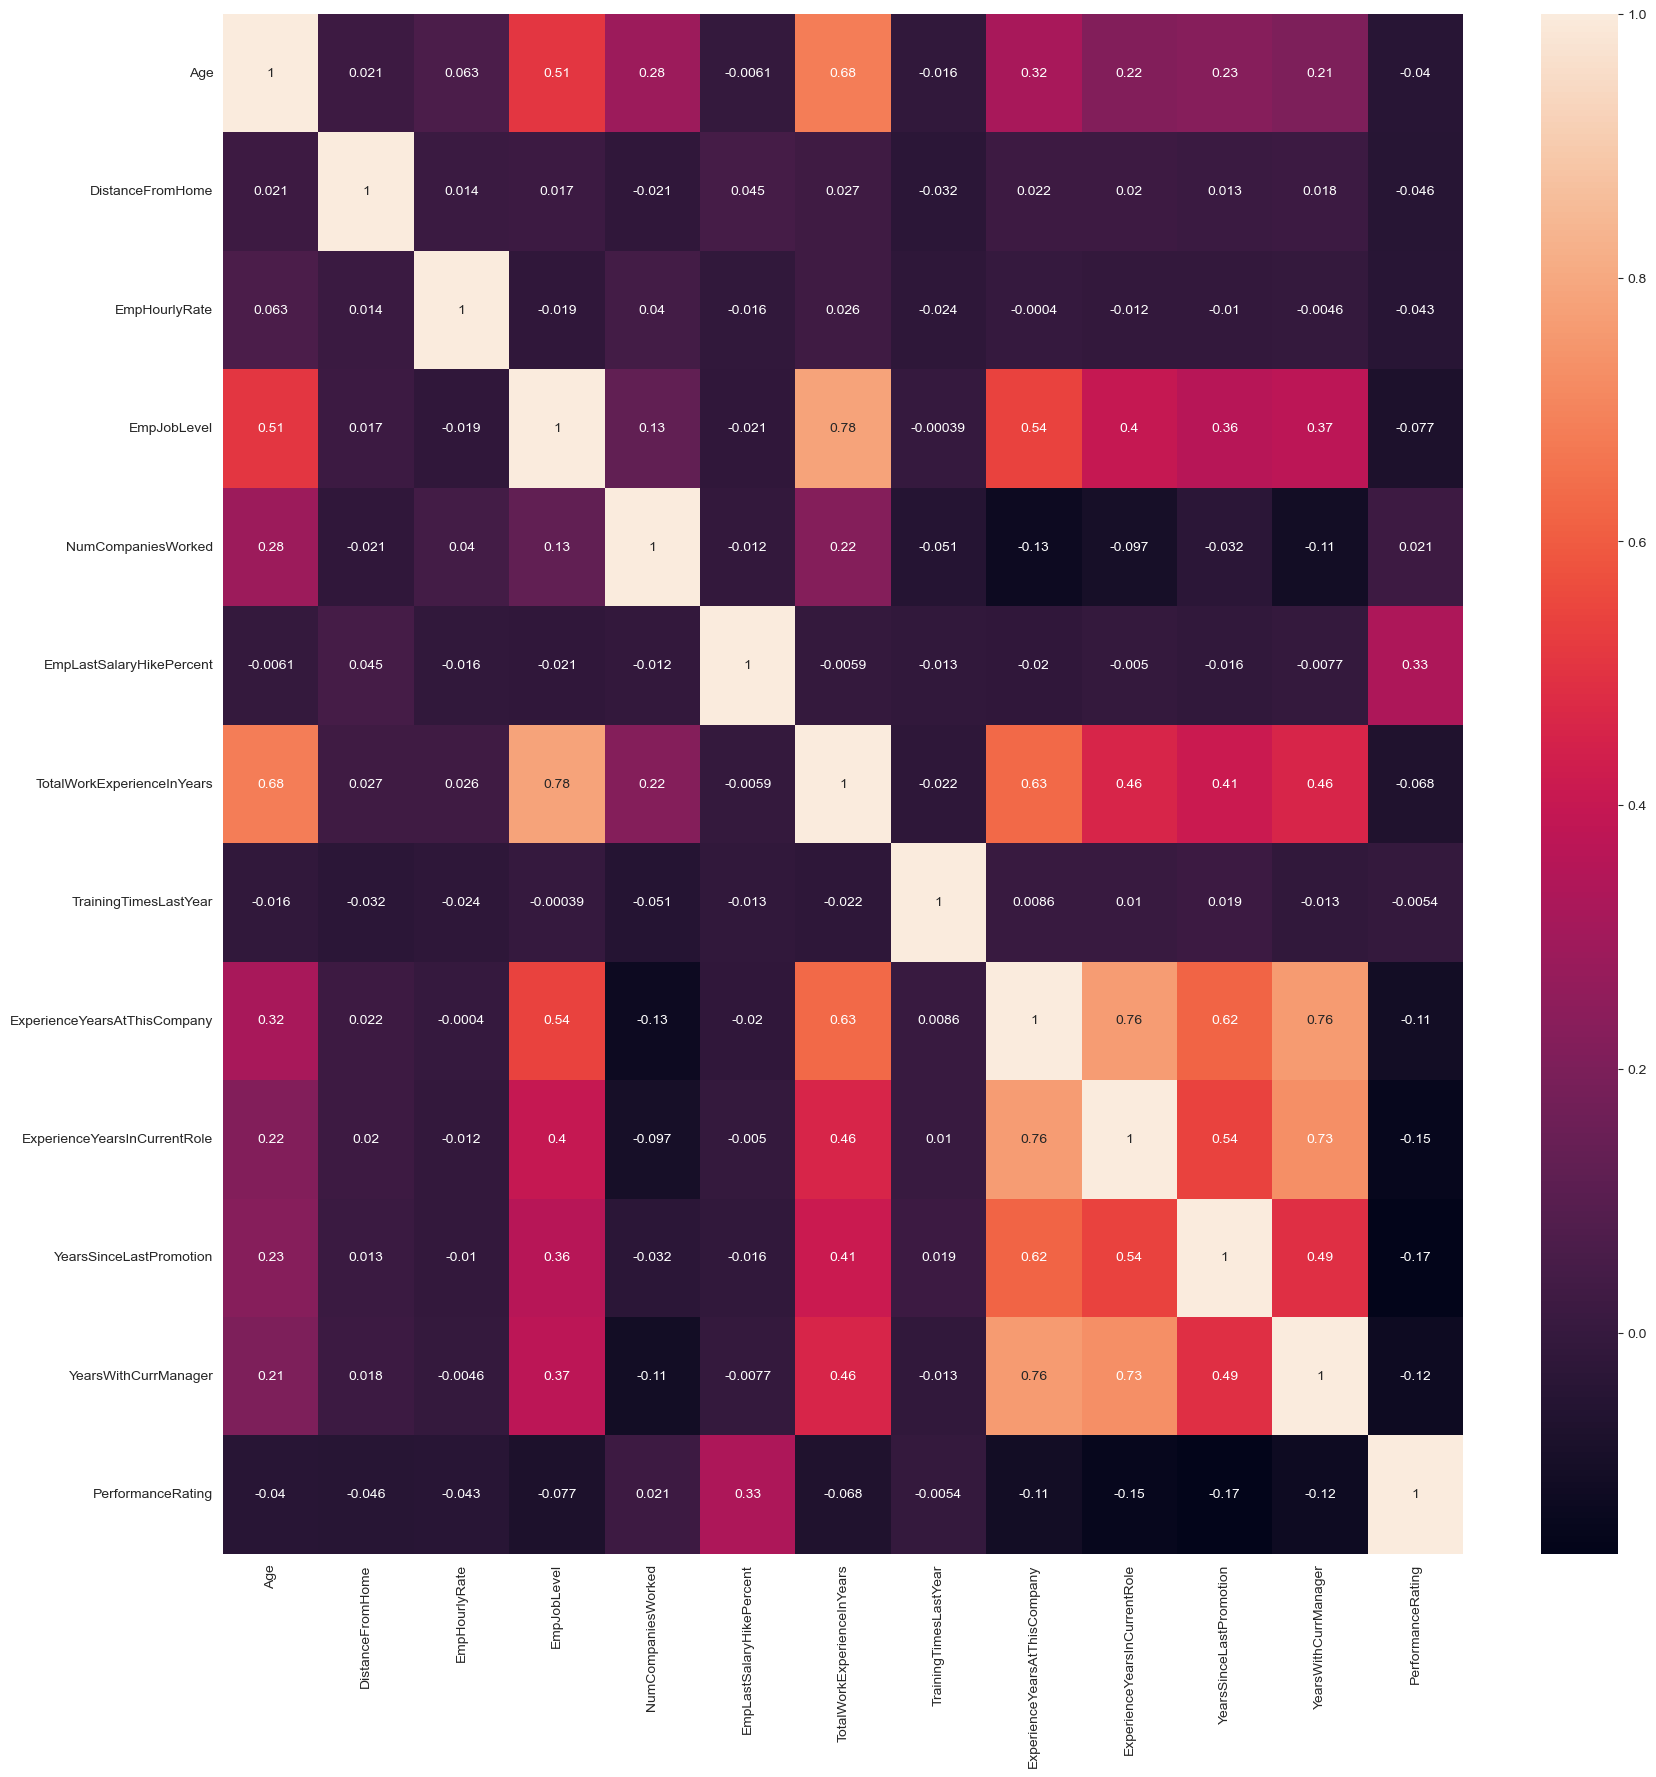

In [76]:
# plotting the heatmap to find the correlation between the features in the data 
plt.figure(figsize=(20, 20), facecolor='white')
sns.heatmap(data=df.corr(),annot=True)
plt.show()

**We do not see any major correlation between features as such no features need to be dropped.**

# Insights Gathered From Exploratory Data Analysis

We will summerize a department wise performance report, so that it can be easily comparable

The purpose of this data analysis is to be able to predict the performance rating of the employees. In order to do so, we first had to do the exploratory data analysis to find meaningful insights of the data.

We see that the age group of 31-40 regardless of gender are prone to leaving the company. Another interesting fact that was observed is that even though most employees that are prone to leaving the company has mostly rated 'high' or 'very high' in each of the department except human resource department. We need management to provide some more benefits other than promotion like job-enrichment or job diversification etc. to make sure to stop employee attrition.

We also wanted to find out whether employees who travel frequently and remain far from home are happy with their job and how they are performing. We found that men who travels more frequently are divorced but they got more outstanding rating. On the other hand women who travel frequently are mostly either married or single and they got more 'Excellent' rating. Very few frequent travelling males and females have rated their work life balance as 'best'. Only in sales and R&D department, employees feel that they have the 'best' work-life balance. In most of the department, employees who got outstanding rating has rated their work-life balance as either 'Good' or 'Bad'. The management has to provide some relief to frequent travelling employees by giving them sabbatical so that they can spend their time with family and they can maintain their work life balance.

Another interesting find from our exploratory data analysis of employee background and their current department, was that in sales & human resources department most of the employees have background of marketing & human resource respectively and most of these employees are given outstanding or excellent rating. R&D and development department has more people from life science and medical background; and most of these employees got excellent rating. Finally. Data Science and Finance department has more employees from life science and medical background and these employees got excellent rating. The management need to decide what type to people to hire for each department. For example, we see very little employee that have technical background. In todays' world of A.I revolution, we need more technical people to handle complex tasks.


# Scope Of Visualization

In this notebook we tried to find out the meaningful insights of different features of our data. However in another notebook called visualization.ipynb we will be digging down more into the features that are responsible for affecting performance rating. 